In [1]:
## The magic four
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Train Test Split 
from sklearn.model_selection import train_test_split

#Scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## StatsModels & SkLearn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

#needed to import and read .xslx file
import openpyxl

%matplotlib inline


from sklearn.metrics import log_loss

In [2]:
def apr(y_real, y_pred):
    
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

In [3]:
performance_metrics = []

In [14]:
df = pd.read_csv('oasis_longitudinal.csv')
data = df.copy()
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [19]:
#data['Group'].replace({"Converted":"Demented"}, inplace= True)
data1 = data.copy()
data1 = data1[data1['diff MR Delay'] >0]
data1.to_csv(r'data_full.csv')

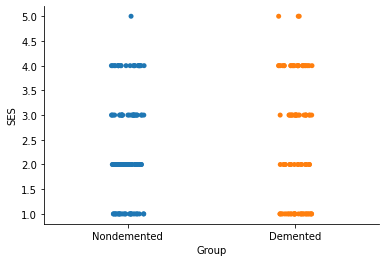

In [21]:
sns.stripplot(x='Group', y='SES', data=data1, jitter=True)
sns.despine()

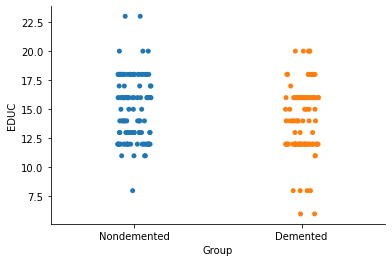

In [23]:
sns.stripplot(x='Group', y='EDUC', data=data1, jitter=True)
sns.despine()

In [1033]:
data.head(50)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [1039]:
data[(data['Age'] < 65) & (data['Group'] == 'Demented')]

#NEED TO GET RID OF 3 DEMENTED

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
51,OAS2_0028,OAS2_0028_MR1,Demented,1,0,M,R,64,18,2.0,22.0,0.5,1547,0.737,1.134
139,OAS2_0066,OAS2_0066_MR1,Demented,1,0,M,R,61,18,1.0,30.0,1.0,1957,0.734,0.897
140,OAS2_0066,OAS2_0066_MR2,Demented,2,497,M,R,62,18,1.0,30.0,0.5,1928,0.731,0.910
231,OAS2_0111,OAS2_0111_MR1,Demented,1,0,M,R,62,12,4.0,17.0,0.5,1525,0.732,1.151


In [1040]:
data[data['Subject ID'] == 'OAS2_0028']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
51,OAS2_0028,OAS2_0028_MR1,Demented,1,0,M,R,64,18,2.0,22.0,0.5,1547,0.737,1.134
52,OAS2_0028,OAS2_0028_MR2,Demented,2,610,M,R,66,18,2.0,21.0,1.0,1562,0.717,1.124


In [1041]:
data[data['Subject ID'] == 'OAS2_0066']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
139,OAS2_0066,OAS2_0066_MR1,Demented,1,0,M,R,61,18,1.0,30.0,1.0,1957,0.734,0.897
140,OAS2_0066,OAS2_0066_MR2,Demented,2,497,M,R,62,18,1.0,30.0,0.5,1928,0.731,0.910


In [1042]:
data[data['Subject ID'] == 'OAS2_0111']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
231,OAS2_0111,OAS2_0111_MR1,Demented,1,0,M,R,62,12,4.0,17.0,0.5,1525,0.732,1.151
232,OAS2_0111,OAS2_0111_MR2,Demented,2,881,M,R,65,12,4.0,17.0,0.5,1520,0.699,1.155


In [1036]:
data[data['Age'] < 65]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
41,OAS2_0022,OAS2_0022_MR1,Nondemented,1,0,F,R,61,16,3.0,30.0,0.0,1313,0.805,1.337
42,OAS2_0022,OAS2_0022_MR2,Nondemented,2,828,F,R,64,16,3.0,29.0,0.0,1316,0.796,1.333
51,OAS2_0028,OAS2_0028_MR1,Demented,1,0,M,R,64,18,2.0,22.0,0.5,1547,0.737,1.134
55,OAS2_0030,OAS2_0030_MR1,Nondemented,1,0,F,R,60,18,1.0,30.0,0.0,1402,0.822,1.252
56,OAS2_0030,OAS2_0030_MR2,Nondemented,2,932,F,R,62,18,1.0,30.0,0.0,1392,0.817,1.261
139,OAS2_0066,OAS2_0066_MR1,Demented,1,0,M,R,61,18,1.0,30.0,1.0,1957,0.734,0.897
140,OAS2_0066,OAS2_0066_MR2,Demented,2,497,M,R,62,18,1.0,30.0,0.5,1928,0.731,0.910
181,OAS2_0086,OAS2_0086_MR1,Nondemented,1,0,F,R,63,15,2.0,28.0,0.0,1544,0.805,1.136
196,OAS2_0094,OAS2_0094_MR1,Nondemented,1,0,F,R,61,16,1.0,30.0,0.0,1513,0.771,1.160
197,OAS2_0094,OAS2_0094_MR2,Nondemented,2,817,F,R,63,16,1.0,30.0,0.0,1449,0.774,1.212


Data Exploration

In [1001]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [1002]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Data Preprocessing

In [16]:
# As there are only nulls in SES and MMSE we can process MR Delay, nWBV, ASF, eTIV. Ideally this should be 
# done after train test split however in order to do this we need all of the subject ID to be grouped
# together which isnt possible after train test split... unless is it?
#Do this before create subset!



#Feature extraction! Put this as a function! Along with subset of data

data['diff MR Delay'] = data['MR Delay'].diff()
data['diff nWBV'] = data['nWBV'].diff()
data['diff ASF'] = data['ASF'].diff()
data['diff etiv'] = data['eTIV'].diff()
# data['% MR Delay'] = data['MR Delay'].pct_change() * 100
data['% nWBV'] = data['nWBV'].pct_change() * 100
# data['% ASF'] = data['ASF'].pct_change() * 100




data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,NaN,NaN,NaN,NaN,NaN
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,457.0,-0.015,-0.007,17.0,-2.155172
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,-457.0,0.055,0.170,-326.0,8.076358
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,560.0,-0.023,-0.036,60.0,-3.125000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,1335.0,-0.012,0.024,-40.0,-1.683029


Selecting Subset of the data

In [6]:
#selecting a subset of the data
data1 = data.copy()
data1 = data1[(data1['diff MR Delay'] > 365) & (data1['diff MR Delay'] < 730)]
#data1 = data1[(data1['diff MR Delay'] > 0 )]

In [1043]:
data1[data1['Subject ID'] == 'OAS2_0066']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV
140,OAS2_0066,OAS2_0066_MR2,Demented,2,497,M,R,62,18,1.0,30.0,0.5,1928,0.731,0.91,497.0,-0.003,0.013,-29.0,-0.408719


In [1044]:
data[data['Subject ID'] == 'OAS2_0028']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
51,OAS2_0028,OAS2_0028_MR1,Demented,1,0,M,R,64,18,2.0,22.0,0.5,1547,0.737,1.134
52,OAS2_0028,OAS2_0028_MR2,Demented,2,610,M,R,66,18,2.0,21.0,1.0,1562,0.717,1.124


In [1019]:
print(data['Subject ID'].nunique())
print(data1['Subject ID'].nunique())

150
101


Data exploring

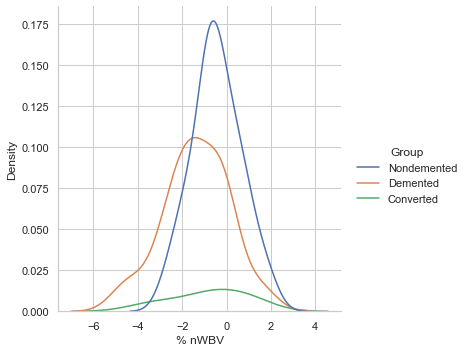

In [1005]:
sns.displot(data1, x='% nWBV', hue='Group', kind='kde')

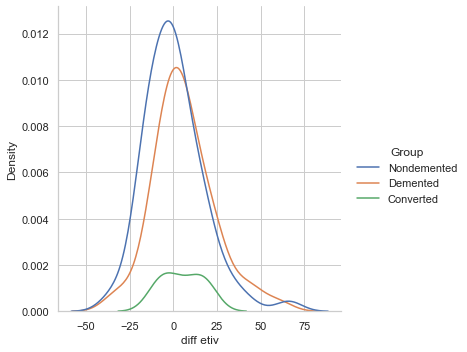

In [1006]:
sns.displot(data1, x='diff etiv', hue='Group', kind='kde')

In [1007]:
grouped_df = data1.groupby('Group')
grouped_df = grouped_df.agg({"Subject ID" : "nunique"})
grouped_df = grouped_df.reset_index()
print(grouped_df)

         Group  Subject ID
0    Converted           8
1     Demented          48
2  Nondemented          45


In [1008]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 1 to 366
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Subject ID     122 non-null    object 
 1   MRI ID         122 non-null    object 
 2   Group          122 non-null    object 
 3   Visit          122 non-null    int64  
 4   MR Delay       122 non-null    int64  
 5   M/F            122 non-null    object 
 6   Hand           122 non-null    object 
 7   Age            122 non-null    int64  
 8   EDUC           122 non-null    int64  
 9   SES            115 non-null    float64
 10  MMSE           120 non-null    float64
 11  CDR            122 non-null    float64
 12  eTIV           122 non-null    int64  
 13  nWBV           122 non-null    float64
 14  ASF            122 non-null    float64
 15  diff MR Delay  122 non-null    float64
 16  diff nWBV      122 non-null    float64
 17  diff ASF       122 non-null    float64
 18  diff etiv 

In [1009]:
data1.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV
count,122.000000,122.000000,122.000000,122.000000,115.000000,120.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2.459016,862.926230,77.959016,14.221311,2.565217,27.200000,0.336066,1493.631148,0.727443,1.191566,577.877049,-0.006311,-0.002180,3.040984,-0.857765
std,0.762201,539.909683,7.150562,3.019256,1.132692,3.658994,0.423692,180.193661,0.034812,0.140185,86.321289,0.010079,0.013339,17.166370,1.382700
min,2.000000,395.000000,62.000000,6.000000,1.000000,15.000000,0.000000,1143.000000,0.646000,0.876000,395.000000,-0.036000,-0.054000,-36.000000,-4.986150
25%,2.000000,542.250000,72.250000,12.000000,2.000000,27.000000,0.000000,1354.000000,0.701000,1.104000,514.500000,-0.012000,-0.008750,-8.000000,-1.714296
50%,2.000000,642.500000,77.000000,14.000000,2.000000,29.000000,0.000000,1472.500000,0.727500,1.191500,578.500000,-0.005000,-0.001000,1.500000,-0.712252
75%,3.000000,980.750000,83.750000,16.000000,3.500000,30.000000,0.500000,1590.000000,0.750750,1.296000,646.000000,0.000000,0.007000,12.750000,0.000000
max,5.000000,2639.000000,94.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.827000,1.535000,729.000000,0.015000,0.029000,66.000000,2.133713


In [492]:
data1[data1.isna().any(axis=1)]

#We see only Subject 0181 has NaN for MMSE so consider dropping this one?
#We can impute for SES, Drop these particiapnts or drop the SES column

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,560.0,-0.023,-0.036,60.0,-3.125000
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286,518.0,-0.021,-0.007,8.0,-2.807487
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208,490.0,-0.016,-0.020,23.0,-2.170963
238,OAS2_0114,OAS2_0114_MR2,Demented,2,570,F,R,78,12,NaN,27.0,1.0,1309,0.709,1.341,570.0,-0.018,0.008,-7.0,-2.475928
323,OAS2_0160,OAS2_0160_MR2,Demented,2,552,M,R,78,12,NaN,29.0,1.0,1569,0.704,1.119,552.0,-0.001,-0.008,12.0,-0.141844
357,OAS2_0181,OAS2_0181_MR2,Demented,2,539,F,R,75,12,NaN,NaN,1.0,1169,0.742,1.501,539.0,0.009,0.002,-2.0,1.227831
358,OAS2_0181,OAS2_0181_MR3,Demented,3,1107,F,R,77,12,NaN,NaN,1.0,1159,0.733,1.515,568.0,-0.009,0.014,-10.0,-1.212938


In [493]:
#Checking correlation in data which might affect final model

data1.corr()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV
Visit,1.000000,0.911500,0.112659,0.034499,-0.065088,0.200927,-0.187321,0.115813,0.015328,-0.115067,-0.049128,0.091917,0.080557,-0.079141,0.087971
MR Delay,0.911500,1.000000,0.123153,0.037537,-0.012121,0.221292,-0.231236,0.112584,0.045591,-0.118930,0.098582,0.094952,0.095191,-0.099192,0.091281
Age,0.112659,0.123153,1.000000,-0.035560,-0.072497,0.063818,-0.164544,0.088701,-0.452883,-0.076083,-0.105516,0.121028,-0.048688,0.073671,0.106202
EDUC,0.034499,0.037537,-0.035560,1.000000,-0.700279,0.227189,-0.087693,0.344598,-0.035537,-0.338038,-0.104982,0.092448,0.101143,-0.113867,0.093199
SES,-0.065088,-0.012121,-0.072497,-0.700279,1.000000,-0.256931,0.069881,-0.326839,0.130587,0.334911,0.168271,-0.020574,-0.028465,0.028283,-0.019207
MMSE,0.200927,0.221292,0.063818,0.227189,-0.256931,1.000000,-0.704367,0.135078,0.330177,-0.125919,0.107304,0.301045,0.212860,-0.193796,0.307714
CDR,-0.187321,-0.231236,-0.164544,-0.087693,0.069881,-0.704367,1.000000,-0.076573,-0.296492,0.076155,-0.122691,-0.277189,-0.140543,0.129899,-0.283427
eTIV,0.115813,0.112584,0.088701,0.344598,-0.326839,0.135078,-0.076573,1.000000,-0.171388,-0.989595,-0.031853,0.022634,-0.121533,0.122855,0.016019
nWBV,0.015328,0.045591,-0.452883,-0.035537,0.130587,0.330177,-0.296492,-0.171388,1.000000,0.170324,0.147191,0.224536,0.219857,-0.242269,0.252342
ASF,-0.115067,-0.118930,-0.076083,-0.338038,0.334911,-0.125919,0.076155,-0.989595,0.170324,1.000000,0.016529,0.001869,0.145161,-0.141130,0.007649


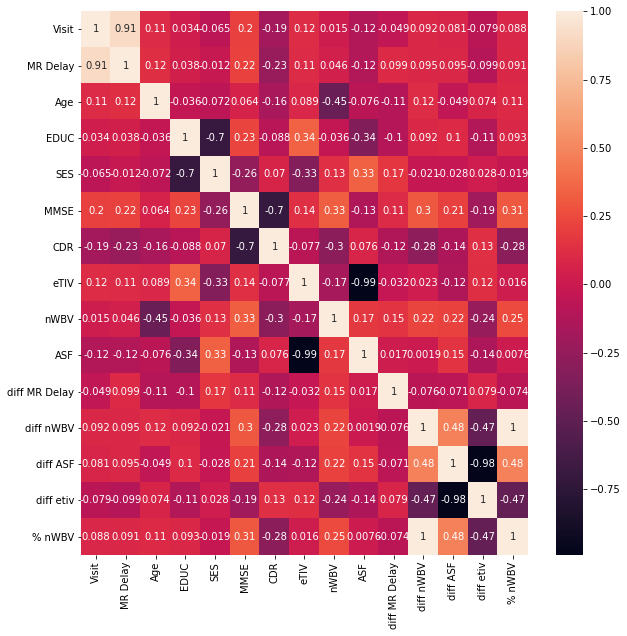

In [494]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),annot=True)
plt.show()

#eTIV and ASF correlated. 
#CDR and MMSE correlated
#SES and EDUC correlated therefore we used EDUC as SES has missing values! Therefore we can drop the SES column for logistic regression

EDA / Exploration

In [1010]:
data1.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF',
       'diff MR Delay', 'diff nWBV', 'diff ASF', 'diff etiv', '% nWBV'],
      dtype='object')

<AxesSubplot:xlabel='Group', ylabel='Age'>

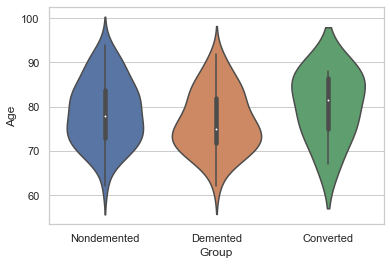

In [1011]:
sns.violinplot(x=data1["Group"], y=data1["Age"])

In [ ]:
sns.violinplot(x=data1["Group"], y=data1["Age"])

<AxesSubplot:xlabel='Group', ylabel='nWBV'>

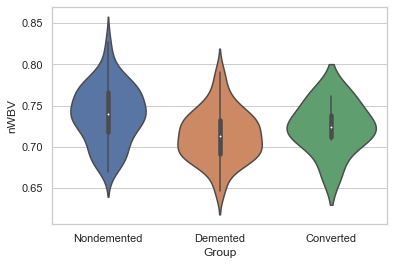

In [1014]:
sns.violinplot(x=data1["Group"], y=data1["nWBV"])

<AxesSubplot:xlabel='Group', ylabel='eTIV'>

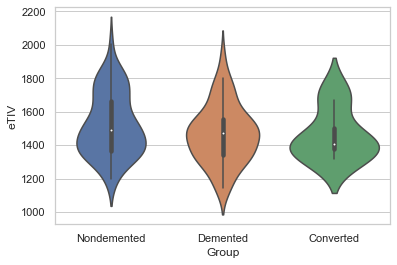

In [1015]:
sns.violinplot(x=data1["Group"], y=data1["eTIV"])

In [1016]:
sns.barplot(x=data1['Gender'])

KeyError: 'Gender'

<AxesSubplot:xlabel='EDUC', ylabel='SES'>

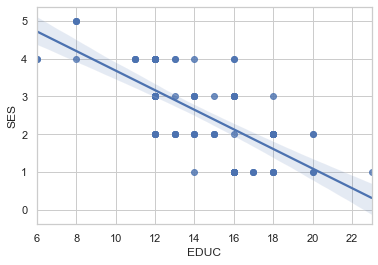

In [1012]:
#scatterplot educ vs ses
sns.regplot(x=data1["EDUC"], y=data1["SES"])

In [ ]:
#drop duplicated rows before train test split.
No_SES = No_SES.drop_duplicates(subset = "Subject ID",
                     keep = 'first')

In [1021]:
data2 = data1.copy()
#drop duplicated rows before train test split.
data2 = data2.drop_duplicates(subset = "Subject ID",
                     keep = 'first')
data2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,457.0,-0.015,-0.007,17.0,-2.155172
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,560.0,-0.023,-0.036,60.0,-3.125000
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462,538.0,0.008,0.018,-15.0,1.126761
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033,593.0,-0.006,0.001,-2.0,-0.843882
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286,518.0,-0.021,-0.007,8.0,-2.807487


Data cleaning

In [7]:
#NO SES and Dropped subject 0181 who had na in MMSE
#Done this as EDUC and SES are correlated! Which would have issues of multicolinearity for logistic regression model

No_SES = data1.copy()
No_SES = No_SES.drop(['SES'], axis = 1)
No_SES = No_SES.dropna()
No_SES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 1 to 366
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Subject ID     120 non-null    object 
 1   MRI ID         120 non-null    object 
 2   Group          120 non-null    object 
 3   Visit          120 non-null    int64  
 4   MR Delay       120 non-null    int64  
 5   M/F            120 non-null    object 
 6   Hand           120 non-null    object 
 7   Age            120 non-null    int64  
 8   EDUC           120 non-null    int64  
 9   MMSE           120 non-null    float64
 10  CDR            120 non-null    float64
 11  eTIV           120 non-null    int64  
 12  nWBV           120 non-null    float64
 13  ASF            120 non-null    float64
 14  diff MR Delay  120 non-null    float64
 15  diff nWBV      120 non-null    float64
 16  diff ASF       120 non-null    float64
 17  diff etiv      120 non-null    float64
 18  % nWBV    

In [222]:
grouped_df = No_SES.groupby('Group')
grouped_df = grouped_df.agg({"Subject ID" : "nunique"})
grouped_df = grouped_df.reset_index()
print(grouped_df)

         Group  Subject ID
0    Converted          14
1     Demented          63
2  Nondemented          72


In [223]:
No_SES[No_SES[['Subject ID']].duplicated() == True]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,22.0,0.5,1698,0.701,1.034,1335.0,-0.012,0.024,-40.0,-1.683029
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,30.0,0.0,1699,0.705,1.033,593.0,-0.006,0.001,-2.0,-0.843882
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,27.0,1.0,1372,0.710,1.279,763.0,-0.017,-0.007,7.0,-2.338377
21,OAS2_0012,OAS2_0012_MR3,Nondemented,3,1598,F,R,83,16,29.0,0.0,1323,0.718,1.327,868.0,-0.020,0.001,0.0,-2.710027
24,OAS2_0013,OAS2_0013_MR3,Nondemented,3,1456,F,R,85,12,29.0,0.0,1225,0.710,1.433,813.0,-0.010,-0.015,13.0,-1.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,OAS2_0178,OAS2_0178_MR3,Nondemented,3,1447,F,R,93,14,30.0,0.0,1488,0.735,1.179,847.0,-0.011,0.005,-7.0,-1.474531
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,30.0,0.0,1506,0.740,1.165,550.0,0.000,0.000,0.0,0.000000
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,30.0,0.0,1510,0.723,1.162,1375.0,-0.017,-0.003,4.0,-2.297297
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,26.0,0.5,1688,0.675,1.040,1455.0,-0.019,0.003,-5.0,-2.737752


In [8]:
#drop duplicated rows before train test split.
No_SES = No_SES.drop_duplicates(subset = "Subject ID",
                     keep = 'first')

In [225]:
No_SES[No_SES[['Subject ID']].duplicated() == True]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV


In [10]:
No_SES['Group'].replace({"Converted":"Demented"}, inplace= True)


In [13]:
No_SES.to_csv(r'C:\Users\Lauren Dunn\Documents\Digital Futures\Capstone\No_SES_clean.csv')

In [12]:
No_SES.shape

(100, 19)

Final check for correlation in data which might affect logistic regression

In [226]:
No_SES.corr()

,Visit,MR Delay,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV
Visit,1.000000,-0.049444,0.001737,-0.098852,0.055614,0.074347,-0.009105,-0.004610,0.003120,-0.049444,-0.044440,0.008834,-0.000235,-0.045279
MR Delay,-0.049444,1.000000,-0.059372,0.119768,0.191767,-0.155110,0.053674,0.088048,-0.047150,1.000000,-0.289427,-0.100587,0.116516,-0.279553
Age,0.001737,-0.059372,1.000000,-0.051922,0.021493,0.013714,-0.005934,-0.499593,0.019633,-0.059372,0.097748,-0.029054,0.037436,0.078169
EDUC,-0.098852,0.119768,-0.051922,1.000000,0.210772,-0.114716,0.209772,0.056369,-0.192880,0.119768,0.031213,0.071282,-0.075947,0.032909
MMSE,0.055614,0.191767,0.021493,0.210772,1.000000,-0.696775,0.025404,0.357956,-0.012019,0.191767,0.235031,0.288856,-0.281013,0.247159
CDR,0.074347,-0.155110,0.013714,-0.114716,-0.696775,1.000000,0.080320,-0.336343,-0.098471,-0.155110,-0.205862,-0.190342,0.181184,-0.219210
eTIV,-0.009105,0.053674,-0.005934,0.209772,0.025404,0.080320,1.000000,-0.190597,-0.988083,0.053674,0.051305,-0.165606,0.195043,0.041524
nWBV,-0.004610,0.088048,-0.499593,0.056369,0.357956,-0.336343,-0.190597,1.000000,0.195120,0.088048,0.262316,0.255229,-0.252675,0.297380
ASF,0.003120,-0.047150,0.019633,-0.192880,-0.012019,-0.098471,-0.988083,0.195120,1.000000,-0.047150,-0.020995,0.180575,-0.202717,-0.010905
diff MR Delay,-0.049444,1.000000,-0.059372,0.119768,0.191767,-0.155110,0.053674,0.088048,-0.047150,1.000000,-0.289427,-0.100587,0.116516,-0.279553


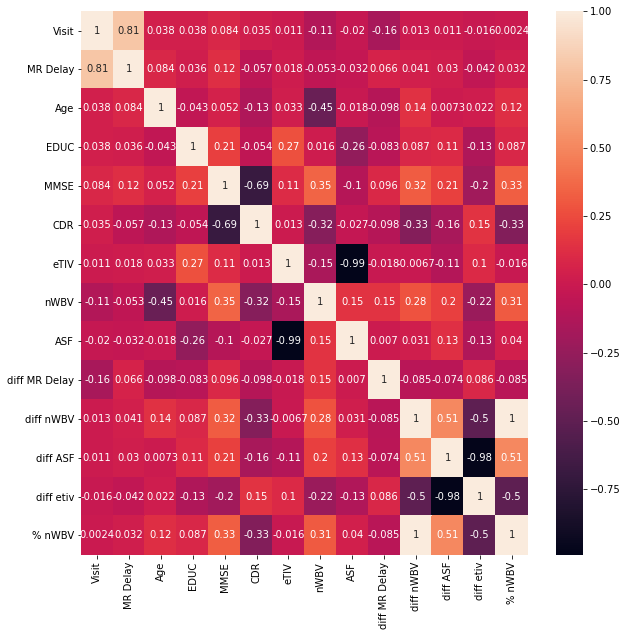

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(No_SES.corr(),annot=True)
plt.show()

#eTIV and ASF correlated. 
#diff eTIV and ASF correlated
#CDR and MMSE correlated
#SES and EDUC correlated therefore we used EDUC as SES has missing values!

In [1020]:
No_SES.head()

,Subject ID,Group,Visit,MR Delay,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV,Gender_M
1,OAS2_0001,0,2,457,88,14,30.0,0.0,2004,0.681,0.876,457.0,-0.015,-0.007,17.0,-2.155172,1
3,OAS2_0002,1,2,560,76,12,28.0,0.5,1738,0.713,1.010,560.0,-0.023,-0.036,60.0,-3.125000,1
6,OAS2_0004,0,2,538,90,18,27.0,0.0,1200,0.718,1.462,538.0,0.008,0.018,-15.0,1.126761,0
9,OAS2_0005,0,3,1603,85,12,30.0,0.0,1699,0.705,1.033,593.0,-0.006,0.001,-2.0,-0.843882,1
11,OAS2_0007,1,3,518,73,16,27.0,1.0,1365,0.727,1.286,518.0,-0.021,-0.007,8.0,-2.807487,1


In [227]:
No_SES.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,30.0,0.0,2004,0.681,0.876,457.0,-0.015,-0.007,17.0,-2.155172
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,28.0,0.5,1738,0.713,1.010,560.0,-0.023,-0.036,60.0,-3.125000
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,27.0,0.0,1200,0.718,1.462,538.0,0.008,0.018,-15.0,1.126761
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,29.0,0.5,1701,0.711,1.032,1010.0,-0.001,-0.007,12.0,-0.140449
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,27.0,1.0,1365,0.727,1.286,518.0,-0.021,-0.007,8.0,-2.807487


Feature Engineering Function

In [339]:
def feature_eng(data):
            
    data = data.drop(['MRI ID', 'Hand'], axis=1)

    data['Group'].replace({"Converted":"Demented"}, inplace= True) #converting Converted to Demented
    #One hoc encoding!
    data['Group'] = data['Group'].replace(['Nondemented','Demented'], [0,1]) #1 hoc encoding ND and D
    data = pd.get_dummies(data, prefix = 'Gender', columns=['M/F'], drop_first=True) # 1 hoc encdoing M/F
    
    return data

In [340]:
No_SES = feature_eng(No_SES)
#No_SES = No_SES.drop(['MRI ID', 'Hand'], axis=1)

In [341]:
No_SES.head()

,Subject ID,Group,Visit,MR Delay,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF,diff MR Delay,diff nWBV,diff ASF,diff etiv,% nWBV,Gender_M
1,OAS2_0001,0,2,457,88,14,30.0,0.0,2004,0.681,0.876,457.0,-0.015,-0.007,17.0,-2.155172,1
3,OAS2_0002,1,2,560,76,12,28.0,0.5,1738,0.713,1.010,560.0,-0.023,-0.036,60.0,-3.125000,1
6,OAS2_0004,0,2,538,90,18,27.0,0.0,1200,0.718,1.462,538.0,0.008,0.018,-15.0,1.126761,0
9,OAS2_0005,0,3,1603,85,12,30.0,0.0,1699,0.705,1.033,593.0,-0.006,0.001,-2.0,-0.843882,1
11,OAS2_0007,1,3,518,73,16,27.0,1.0,1365,0.727,1.286,518.0,-0.021,-0.007,8.0,-2.807487,1


In [342]:
grouped_df = No_SES.groupby('Group')
grouped_df = grouped_df.agg({"Subject ID" : "nunique"})
grouped_df = grouped_df.reset_index()
print(grouped_df)


#we have unbalanced classes!

   Group  Subject ID
0      0          45
1      1          55


In [343]:
No_SES.columns

Index(['Subject ID', 'Group', 'Visit', 'MR Delay', 'Age', 'EDUC', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF', 'diff MR Delay', 'diff nWBV', 'diff ASF',
       'diff etiv', '% nWBV', 'Gender_M'],
      dtype='object')

In [344]:
feature_cols = [#'Subject ID', 
                #'Group', 
                #'Visit', 
                #'MR Delay'
                #'M/F',
                'Age', 
                'EDUC',
                'MMSE', 
                #'CDR', Improves by a mile off! Maybe we could predict CDR instead of dementia vs non dementia?
                #'eTIV', 
                #'nWBV', 
                #'ASF', 
                'diff MR Delay', 
                'diff nWBV',
                #'diff ASF', 
                'diff etiv', 
                #'% nWBV',
                'Gender_M'
]

In [345]:
#NO SES used!
#Demented = 1
X = No_SES[feature_cols]
X = sm.add_constant(X)
y = No_SES['Group']

C:\Users\Lauren Dunn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [346]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=56, stratify=y)

In [347]:
##on train
train = X_train.copy()
train['target'] = y_train
#train.head()
## Take a sample - for tweaking preprocessing

#samp = train.sample(n = 15000, random_state = 43)
##full set
samp = train.copy()

In [348]:
samp.head()

,const,Age,EDUC,MMSE,diff MR Delay,diff nWBV,diff etiv,Gender_M,target
175,1.0,68,15,30.0,580.0,-0.014,8.0,1,1
334,1.0,73,18,30.0,691.0,0.008,-12.0,0,0
16,1.0,69,12,24.0,576.0,-0.015,23.0,1,1
214,1.0,76,18,30.0,679.0,0.005,-21.0,0,0
242,1.0,74,20,30.0,576.0,0.001,-36.0,1,0


In [349]:

counts = pd.DataFrame(samp.groupby('target')['EDUC'].count())
total = counts.EDUC.sum()

counts['percentage'] = round(100* (counts['EDUC']/total))
counts['label'] = counts.index
print(counts)

        EDUC  percentage  label
target                         
0         34        45.0      0
1         41        55.0      1


In [350]:
##on train
test = X_test.copy()
test['target'] = y_test
#train.head()
## Take a sample - for tweaking preprocessing

#samp = train.sample(n = 15000, random_state = 43)
##full set
samp = test.copy()



counts = pd.DataFrame(samp.groupby('target')['EDUC'].count())
total = counts.EDUC.sum()

counts['percentage'] = round(100* (counts['EDUC']/total))
counts['label'] = counts.index
print(counts)

        EDUC  percentage  label
target                         
0         11        44.0      0
1         14        56.0      1


In [351]:
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()

In [241]:
X_train_eng

,const,Age,EDUC,MMSE,diff MR Delay,diff nWBV,diff etiv,Gender_M
182,1.0,65,15,28.0,802.0,-0.013,-2.0,0
77,1.0,83,18,25.0,486.0,-0.009,5.0,0
89,1.0,69,14,15.0,352.0,-0.007,-2.0,1
341,1.0,62,12,30.0,695.0,-0.011,-1.0,1
210,1.0,80,11,30.0,1218.0,-0.020,3.0,0
...,...,...,...,...,...,...,...,...
54,1.0,80,12,30.0,1099.0,0.001,13.0,0
117,1.0,67,13,27.0,726.0,-0.010,3.0,1
98,1.0,66,16,21.0,248.0,-0.008,13.0,1
79,1.0,86,6,27.0,567.0,-0.003,10.0,1


In [352]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [353]:
# this code serves to separate the constant from the dataframe
# if the consant is scaled it is reduced to 0 and becomes useless
# here we also re-index the scaled dataframe since it loses the index when scaled
if 'const' in list(X_train_eng.columns) and 'const' in list(X_test_eng.columns):

    # Fit and scale the training data
    c = pd.DataFrame(X_train_eng['const'])
    c.reset_index(drop = True, inplace = True)

    X_train_eng.drop(columns = 'const', inplace = True)

    scaled_X_train = scaler.fit_transform(X_train_eng)

    precols = list(X_train_eng.columns)
    scaled_X_train = pd.DataFrame(scaled_X_train, columns= precols)

    scaled_X_train = pd.concat([c,scaled_X_train], axis = 1)

    scaled_X_train.set_index(X_train_eng.reset_index()['index'], inplace = True)

    # Scale the test data 

    k = pd.DataFrame(X_test_eng['const'])
    k.reset_index(drop = True, inplace = True)

    X_test_eng.drop(columns = 'const', inplace = True)

    scaled_X_test = scaler.transform(X_test_eng)

    scaled_X_test = pd.DataFrame(scaled_X_test, columns= precols)

    scaled_X_test = pd.concat([k,scaled_X_test], axis = 1)

    scaled_X_test.set_index(X_test_eng.reset_index()['index'], inplace = True)

else:
    precols = list(X_train_eng.columns)
    
    scaled_X_train = scaler.fit_transform(X_train_eng)
    scaled_X_train = pd.DataFrame(scaled_X_train, columns= precols)
    
    scaled_X_train.set_index(X_train_eng.reset_index()['index'], inplace = True)

    scaled_X_test = scaler.transform(X_test_eng)
    scaled_X_test = pd.DataFrame(scaled_X_test, columns= precols)
    
    scaled_X_test.set_index(X_test_eng.reset_index()['index'], inplace = True)

Checking for multicolinearity before doing model

In [354]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = scaled_X_train.iloc[:,:-1]
calc_vif(X)

# no multicolinearirty

,variables,VIF
0,const,41.932458
1,Age,1.067333
2,EDUC,1.115024
3,MMSE,1.205008
4,diff MR Delay,1.087222
5,diff nWBV,1.453379
6,diff etiv,1.370534


1ST Logistic Regression Model

In [355]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
my_model = logreg.fit(scaled_X_train,y_train)

#How did it perform on x train?
y_pred = logreg.predict(scaled_X_train)
y_pred_proba=logreg.predict_proba(scaled_X_train)

In [356]:
#min max scaler
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))
print("F1 Score:",metrics.f1_score(y_train, y_pred))

Accuracy: 0.8133333333333334
Precision: 0.8461538461538461
Recall: 0.8048780487804879
F1 Score: 0.8250000000000001


In [246]:
# standard scaler
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))
print("F1 Score:",metrics.f1_score(y_train, y_pred))

Accuracy: 0.7927927927927928
Precision: 0.84
Recall: 0.7368421052631579
F1 Score: 0.7850467289719626


In [111]:
# No diff eTIV but just eTIV
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))
print("F1 Score:",metrics.f1_score(y_train, y_pred))

Accuracy: 0.8266666666666667
Precision: 0.8888888888888888
Recall: 0.7804878048780488
F1 Score: 0.8311688311688312


Cross Validation 

Train

In [357]:
scores = cross_val_score(logreg, scaled_X_train, y_train, cv=4, scoring='accuracy')
print("The accuracy scores are:", scores)
print("The accuracy mean scores is:", np.mean(scores))
print("The accuracy standard of the scores is:" , scores.std())

The accuracy scores are: [0.73684211 0.78947368 0.84210526 0.66666667]
The accuracy mean scores is: 0.7587719298245613
The accuracy standard of the scores is: 0.06490635345152958


In [358]:
#etiv not diff etiv

scores = cross_val_score(logreg, scaled_X_train, y_train, cv=4, scoring='f1')
print("The accuracy scores are:", scores)
print("The accuracy mean scores is:", np.mean(scores))
print("The accuracy standard of the scores is:" , scores.std())

The accuracy scores are: [0.73684211 0.8        0.86956522 0.7       ]
The accuracy mean scores is: 0.7766018306636155
The accuracy standard of the scores is: 0.0644948482925439


In [205]:
scores = cross_val_score(logreg, scaled_X_train, y_train, cv=4, scoring='recall')
print("The recall scores are:", scores)
print("The recall mean scores is:", np.mean(scores))
print("The recall standard of the scores is:" , scores.std())

The recall scores are: [0.72727273 0.8        1.         0.6       ]
The recall mean scores is: 0.7818181818181819
The recall standard of the scores is: 0.1448852495500839


In [26]:
scores = cross_val_score(logreg, scaled_X_train, y_train, cv=4, scoring='f1')
print("The recall scores are:", scores)
print("The recall mean scores is:", np.mean(scores))
print("The recall standard deviation of the scores is:" , scores.std())

The recall scores are: [0.73684211 0.84210526 0.95238095 0.66666667]
The recall mean scores is: 0.7994987468671678
The recall standard deviation of the scores is: 0.10811856947430075


In [24]:
cv = LeaveOneOut()

scores = cross_val_score(logreg, scaled_X_train, y_train,
                         cv=cv)
print("The recall scores are:", scores)
print("The recall mean scores is:", np.mean(scores))
print("The recall standard deviation of the scores is:" , scores.std())

The recall scores are: [0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1.]
The recall mean scores is: 0.8
The recall standard deviation of the scores is: 0.4


Test

In [359]:
scores = cross_val_score(logreg, scaled_X_test, y_test, cv=4, scoring='accuracy')
print("The recall scores are:", scores)
print("The recall mean scores is:", np.mean(scores))
print("The recall standard deviation of the scores is:" , scores.std() *100)

The recall scores are: [0.71428571 0.83333333 0.83333333 0.66666667]
The recall mean scores is: 0.7619047619047619
The recall standard deviation of the scores is: 7.338588098772593


In [360]:
#etiv not diff etiv

scores = cross_val_score(logreg, scaled_X_test, y_test, cv=4, scoring='f1')
print("The recall scores are:", scores)
print("The recall mean scores is:", np.mean(scores))
print("The recall standard deviation of the scores is:" , scores.std() *100)

The recall scores are: [0.75       0.88888889 0.8        0.66666667]
The recall mean scores is: 0.7763888888888889
The recall standard deviation of the scores is: 8.054358148554435


In [196]:
scores = cross_val_score(logreg, scaled_X_test, y_test, cv=4, scoring='f1')
print("The recall scores are:", scores)
print("The recall mean scores is:", np.mean(scores))
print("The recall standard deviation of the scores is:" , scores.std() *100)

The recall scores are: [0.66666667 0.75       0.4        0.4       ]
The recall mean scores is: 0.5541666666666666
The recall standard deviation of the scores is: 15.695673501531132


In [ ]:
grid={"C": [0.001,0.01,0.1,1,10,100,1000], 
      "penalty":["l1","l2"]}

logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,grid,
                       cv=10, 
                       scoring= 'accuracy')

logreg_cv.fit(scaled_X_train,y_train)
logreg_cv.fit(scaled_X_train,y_train)

Grid Search for best parameters

In [361]:
kfolds = 10
grid={"C": [0.001,0.01,0.1,1,10,100,1000], 
      "penalty":["l1","l2"]}# l1 lasso l2 ridge   #np.logspace(-3,3,7)

logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,grid,
                       cv=kfolds, 
                       scoring= 'accuracy')

logreg_cv.fit(scaled_X_train,y_train)

C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Lauren Dunn\anaconda3\lib\site-packa

C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Lauren Dunn\anaconda3\lib\site-packa

C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Lauren Dunn\anaconda3\lib\site-packa

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [362]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 100, 'penalty': 'l2'}
accuracy : 0.8035714285714286


In [397]:
# import sklearn
# print(sorted(sklearn.metrics.SCORERS.keys()))

In [363]:
kfolds = 10
grid={"C": [0.001,0.01,0.1,1,10,100,1000], 
      "penalty":["l1","l2"]}# l1 lasso l2 ridge   #np.logspace(-3,3,7)

logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,grid,cv=kfolds, scoring= 'f1')

logreg_cv.fit(scaled_X_train,y_train)

C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Lauren Dunn\anaconda3\lib\site-packa

C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Lauren Dunn\anaconda3\lib\site-packa

C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Lauren Dunn\anaconda3\lib\site-packa

C:\Users\Lauren Dunn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.70722611        nan 0.70722611        nan 0.71030303
        nan 0.80126984        nan 0.78119048        nan 0.80301587
        nan 0.80301587]
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [364]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("recall :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100, 'penalty': 'l2'}
recall : 0.803015873015873


Final Logistic Regression Model

In [378]:
Basic

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
my_model = logreg.fit(scaled_X_train,y_train)

#How did it perform on x train?
y_pred = logreg.predict(scaled_X_train)
y_pred_proba=logreg.predict_proba(scaled_X_train)

In [379]:
#1 year apart (accidentally used best paramaters :())
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))
print("F1 Score:",metrics.f1_score(y_train, y_pred))

Accuracy: 0.8133333333333334
Precision: 0.8461538461538461
Recall: 0.8048780487804879
F1 Score: 0.8250000000000001


In [367]:
#BEST ONE


from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(C= 100,
                            penalty = 'l2')

# fit the model with data
my_model = logreg.fit(scaled_X_train,y_train)

#How did it perform on x train?
y_pred = logreg.predict(scaled_X_train)
y_pred_proba=logreg.predict_proba(scaled_X_train)

In [368]:
#1 year apart (accidentally used best paramaters :())
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))
print("F1 Score:",metrics.f1_score(y_train, y_pred))

Accuracy: 0.8533333333333334
Precision: 0.9166666666666666
Recall: 0.8048780487804879
F1 Score: 0.8571428571428571


In [117]:
# from sklearn.linear_model import LogisticRegression

# # instantiate the model (using the default parameters)
# logreg = LogisticRegression(C= 100, penalty = 'l2')

# # fit the model with data
# my_model = logreg.fit(scaled_X_train,y_train)

# #How did it perform on x train?
# y_pred = logreg.predict(scaled_X_train)
# y_pred_proba=logreg.predict_proba(scaled_X_train)

Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

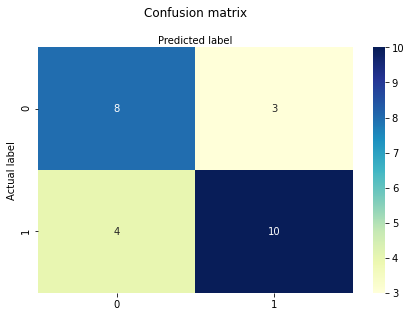

In [398]:
cm = confusion_matrix(y_train, y_pred) #, labels=[1,0]
print(cm)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Metric Scores

In [371]:
#1 year apart (accidentally used best paramaters :())
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))
print("F1 Score:",metrics.f1_score(y_train, y_pred))

Accuracy: 0.8533333333333334
Precision: 0.9166666666666666
Recall: 0.8048780487804879
F1 Score: 0.8571428571428571


In [372]:
lg_acc_train = metrics.accuracy_score(y_train, y_pred)
lg_prec_train = metrics.precision_score(y_train, y_pred)
lg_rec_train = metrics.recall_score(y_train, y_pred)
lg_f1_train = metrics.f1_score(y_train, y_pred)

Putting model on Test

In [380]:
#How did it before on X_Test?
y_pred=logreg.predict(scaled_X_test)
y_pred_proba=logreg.predict_proba(scaled_X_test)

Confusion Matrix 

In [381]:
#confusion matrix#
cm = confusion_matrix(y_test, y_pred) #labels=[1,0])
print(cm)

[[ 8  3]
 [ 4 10]]


Text(0.5, 257.44, 'Predicted label')

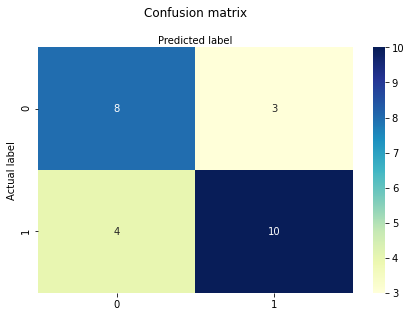

In [382]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Metrics for test

In [376]:
#1 year apart
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.64
Precision: 0.6923076923076923
Recall: 0.6428571428571429
F1 Score: 0.6666666666666666


In [377]:
lg_acc_test = metrics.accuracy_score(y_test, y_pred)
lg_prec_test = metrics.precision_score(y_test, y_pred)
lg_rec_test = metrics.recall_score(y_test, y_pred)
lg_f1_test = metrics.f1_score(y_test, y_pred)

In [383]:
#etiv not diff etiv
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.7692307692307693
Recall: 0.7142857142857143
F1 Score: 0.7407407407407408


In [384]:
lg_acc_test = metrics.accuracy_score(y_test, y_pred)
lg_prec_test = metrics.precision_score(y_test, y_pred)
lg_rec_test = metrics.recall_score(y_test, y_pred)
lg_f1_test = metrics.f1_score(y_test, y_pred)

Area under curve

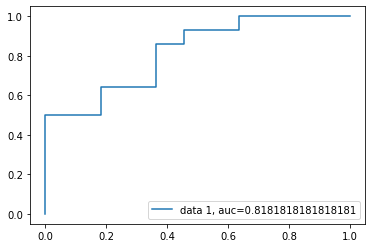

In [128]:
y_pred_proba = logreg.predict_proba(scaled_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Support Vector Machine Method


In [124]:
#As we dont have issues of multicolineariy we are going to use with SES and without SES to see if it improves overall model!
from sklearn.svm import SVC

In [385]:
clf_svm = SVC() #randomstate = 42
clf_svm.fit(scaled_X_train, y_train) #training it on the training data

SVC()

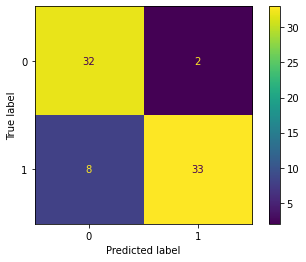

In [386]:
plot_confusion_matrix(clf_svm, #train vector machine
                      scaled_X_train, #passing our test
                      y_train, #passing our y test
                     )

In [387]:
#default scores
apr(y_train, clf_svm.predict(scaled_X_train))

Accuracy:0.8666666666666667
Precision:0.9428571428571428
Recall:0.8048780487804879
F1:0.868421052631579


(0.8666666666666667, 0.9428571428571428, 0.8048780487804879, 0.868421052631579)

In [127]:
#etiv not diff etiv
apr(y_train, clf_svm.predict(scaled_X_train))

Accuracy:0.9066666666666666
Precision:0.9722222222222222
Recall:0.8536585365853658
F1:0.9090909090909091


(0.9066666666666666,
 0.9722222222222222,
 0.8536585365853658,
 0.9090909090909091)

In [ ]:
#random state 42

(0.88, 0.9444444444444444, 0.8292682926829268, 0.883116883116883)
(0.6, 0.6666666666666666, 0.5714285714285714, 0.6153846153846153)

In [388]:
svm_acc_train = metrics.accuracy_score(y_train, clf_svm.predict(scaled_X_train))
svm_prec_train = metrics.precision_score(y_train, clf_svm.predict(scaled_X_train))
svm_rec_train = metrics.recall_score(y_train, clf_svm.predict(scaled_X_train))
svm_f1_train = metrics.f1_score(y_train, clf_svm.predict(scaled_X_train))

Test

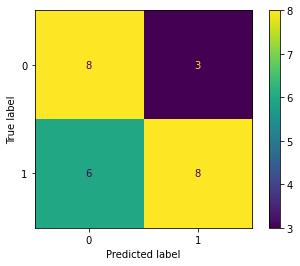

In [389]:
plot_confusion_matrix(clf_svm, #train vector machine
                      scaled_X_test, #passing our test
                      y_test, #passing our y test
                     )

In [390]:
# #train scores when we dont change parameters!
apr(y_test, clf_svm.predict(scaled_X_test))

Accuracy:0.64
Precision:0.7272727272727273
Recall:0.5714285714285714
F1:0.64


(0.64, 0.7272727272727273, 0.5714285714285714, 0.64)

In [130]:
# etiv not diff etiv
apr(y_test, clf_svm.predict(scaled_X_test))

Accuracy:0.64
Precision:0.7272727272727273
Recall:0.5714285714285714
F1:0.64


(0.64, 0.7272727272727273, 0.5714285714285714, 0.64)

In [ ]:
(0.88, 0.9444444444444444, 0.8292682926829268, 0.883116883116883)
(0.6, 0.6666666666666666, 0.5714285714285714, 0.6153846153846153)

Support Vector Regression

In [45]:
# from sklearn.svm import LinearSVR

# svm_reg = LinearSVR(epsilon = 0.5)
# svm_reg.fit(scaled_X_train,y_train)

In [38]:
# y_pred = svm_reg.predict(scaled_X_train)

In [44]:
# y_pred

In [43]:
# y_train

In [42]:
# cm = confusion_matrix(y_train, y_pred) #, labels=[1,0]
# print(cm)

# class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)


# # create heatmap
# sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

In [ ]:
# train scores
# apr(y_train, clf_svm.predict(scaled_X_train))


Cross Validation Scores -somehow plot these scores?

In [169]:
cv_scores_svm = cross_val_score(clf_svm, scaled_X_train, y_train, cv = 5, scoring = 'accuracy')
print("The accuracy scores are:", cv_scores_svm)
print("The accuracy mean scores is:", np.mean(cv_scores_svm))
print("The accuracy standard deviation of the scores is:" , cv_scores_svm.std() * 100, "%")

The accuracy scores are: [0.8        0.93333333 0.86666667 0.93333333 0.86666667]
The accuracy mean scores is: 0.8800000000000001
The accuracy standard deviation of the scores is: 4.988876515698588 %


In [170]:
cv_f1_scores_svm = cross_val_score(clf_svm, scaled_X_train, y_train, cv = 5, scoring = 'f1')
print("The f1 scores are:", cv_f1_scores_svm)
print("The f1 mean scores is:", np.mean(cv_f1_scores_svm))
print("The f1 standard deviation of the scores is:" , cv_f1_scores_svm.std() * 100, "%")

The f1 scores are: [0.82352941 0.94117647 0.875      0.93333333 0.85714286]
The f1 mean scores is: 0.8860364145658263
The f1 standard deviation of the scores is: 4.5035962983502476 %


In [131]:
#etiv

cv_f1_scores_svm = cross_val_score(clf_svm, scaled_X_train, y_train, cv = 5, scoring = 'f1')
print("The f1 scores are:", cv_f1_scores_svm)
print("The f1 mean scores is:", np.mean(cv_f1_scores_svm))
print("The f1 standard deviation of the scores is:" , cv_f1_scores_svm.std() * 100, "%")

The f1 scores are: [0.82352941 0.93333333 0.71428571 0.875      0.58823529]
The f1 mean scores is: 0.7868767507002802
The f1 standard deviation of the scores is: 12.270822471848211 %


In [155]:
cross_val_score(clf_svm, scaled_X_train, y_train, cv = 5, scoring = 'recall')

array([0.6 , 1.  , 0.75, 0.75, 0.5 , 1.  , 1.  , 0.75, 0.75, 0.75])

CV Scores test

In [174]:
cv_scores_svm = cross_val_score(clf_svm, scaled_X_test, y_test, cv = 5, scoring = 'accuracy')
print("The accuracy scores are:", cv_scores_svm)
print("The accuracy mean scores is:", np.mean(cv_scores_svm))
print("The accuracy standard deviation of the scores is:" , cv_scores_svm.std() * 100, "%")

The accuracy scores are: [0.8 0.6 0.6 0.8 0.6]
The accuracy mean scores is: 0.6799999999999999
The accuracy standard deviation of the scores is: 9.797958971132717 %


In [175]:
cv_f1_scores_svm = cross_val_score(clf_svm, scaled_X_test, y_test, cv = 5, scoring = 'f1')
print("The f1 scores are:", cv_f1_scores_svm)
print("The f1 mean scores is:", np.mean(cv_f1_scores_svm))
print("The f1 standard deviation of the scores is:" , cv_f1_scores_svm.std() * 100, "%")

The f1 scores are: [0.85714286 0.66666667 0.75       0.8        0.5       ]
The f1 mean scores is: 0.7147619047619047
The f1 standard deviation of the scores is: 12.427020519910135 %


Grid Search

In [391]:
# creating list of parameter values
#is this a corase grid search? then we need to do a more finer grid search once we've chosen ?




param_grid = [
    {'kernel': ['linear', 'poly', 'sigmoid', 'rbf'], 
     'C': [0.001, 0.01, 0.1, 1.0, 10, 20, 30, 40, 50, 100, 1000], 
     'gamma': ['scale', 'auto', 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'random_state' : [42]}
]


optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=10, #cross validation #default is 5
    scoring='f1',
)

optimal_params.fit(scaled_X_train,y_train)
print(optimal_params.best_params_)

{'C': 50, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 42}


Best SVM

In [392]:
#etiv
clf_svm = SVC(random_state=42, C=50, gamma = 'auto', kernel = 'sigmoid')
clf_svm.fit(scaled_X_train, y_train) 


SVC(C=50, gamma='auto', kernel='sigmoid', random_state=42)

In [183]:
#default.. choose this one i reckon!
clf_svm = SVC(random_state=42, C=1.0, gamma = 'scale', kernel = 'rbf')
clf_svm.fit(scaled_X_train, y_train) 

#(0.88, 0.9444444444444444, 0.8292682926829268, 0.883116883116883)

(0.88, 0.9444444444444444, 0.8292682926829268, 0.883116883116883)

In [47]:
#best for f1 score and accuracy with 5 cv
clf_svm = SVC(random_state=42, C=10, gamma = 'scale', kernel = 'sigmoid')
clf_svm.fit(scaled_X_train, y_train) 

SVC(C=10, kernel='sigmoid', random_state=42)

In [53]:
#best for recall with 5 cv
clf_svm = SVC(random_state=42, C=0.001, gamma = 'scale', kernel = 'linear')
clf_svm.fit(scaled_X_train, y_train) 

SVC(C=0.001, kernel='linear', random_state=42)

In [136]:
#best for f1 scores with 10 cv
clf_svm = SVC(random_state=42, C=10, gamma = 'auto', kernel = 'sigmoid')
clf_svm.fit(scaled_X_train, y_train) 

(0.7066666666666667, 0.7435897435897436, 0.7073170731707317, 0.725)

(0.7066666666666667, 0.7435897435897436, 0.7073170731707317, 0.725)

In [91]:
#best for accuracy scores with 10 cv
clf_svm = SVC(random_state=42, C=1.0, gamma = 'scale', kernel = 'linear')
clf_svm.fit(scaled_X_train, y_train) 

(0.84, 0.9393939393939394, 0.7560975609756098, 0.8378378378378378)

SVC(kernel='linear', random_state=42)

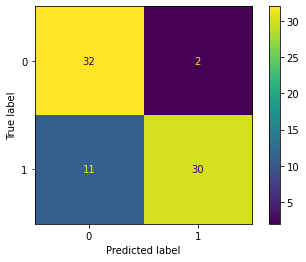

In [393]:
plot_confusion_matrix(clf_svm, #train vector machine
                      scaled_X_train, #passing our test
                      y_train, #passing our y test
                     )

In [394]:
# best for recall with 5 cv
apr(y_train, clf_svm.predict(scaled_X_train))


Accuracy:0.8266666666666667
Precision:0.9375
Recall:0.7317073170731707
F1:0.821917808219178


(0.8266666666666667, 0.9375, 0.7317073170731707, 0.821917808219178)

In [135]:
# etiv not diff
apr(y_train, clf_svm.predict(scaled_X_train))


Accuracy:0.84
Precision:0.9393939393939394
Recall:0.7560975609756098
F1:0.8378378378378378


(0.84, 0.9393939393939394, 0.7560975609756098, 0.8378378378378378)

In [92]:
#best accuracy 10 cv
apr(y_train, clf_svm.predict(scaled_X_train))


Accuracy:0.84
Precision:0.9393939393939394
Recall:0.7560975609756098
F1:0.8378378378378378


(0.84, 0.9393939393939394, 0.7560975609756098, 0.8378378378378378)

In [138]:
#f1 scores, 10 cv. still lower
apr(y_train, clf_svm.predict(scaled_X_train))


Accuracy:0.7066666666666667
Precision:0.7435897435897436
Recall:0.7073170731707317
F1:0.725


(0.7066666666666667, 0.7435897435897436, 0.7073170731707317, 0.725)

In [89]:
#parameters used at the start
apr(y_train, clf_svm.predict(scaled_X_train))



Accuracy:0.88
Precision:0.9444444444444444
Recall:0.8292682926829268
F1:0.883116883116883


(0.88, 0.9444444444444444, 0.8292682926829268, 0.883116883116883)

In [49]:
#Best scores for f1?
apr(y_train, clf_svm.predict(scaled_X_train))


(0.88, 0.9444444444444444, 0.8292682926829268, 0.883116883116883)
(0.6, 0.6666666666666666, 0.5714285714285714, 0.6153846153846153)

Accuracy:0.7066666666666667
Precision:0.7435897435897436
Recall:0.7073170731707317
F1:0.725


(0.7066666666666667, 0.7435897435897436, 0.7073170731707317, 0.725)

In [273]:
#Best scores for accuracy
apr(y_train, clf_svm.predict(scaled_X_train))


Accuracy:0.8648648648648649
Precision:0.85
Recall:0.8947368421052632
F1:0.8717948717948718


(0.8648648648648649, 0.85, 0.8947368421052632, 0.8717948717948718)

In [274]:
svm_acc_train = metrics.accuracy_score(y_train, clf_svm.predict(scaled_X_train))
svm_prec_train = metrics.precision_score(y_train, clf_svm.predict(scaled_X_train))
svm_rec_train = metrics.recall_score(y_train, clf_svm.predict(scaled_X_train))
svm_f1_train = metrics.f1_score(y_train, clf_svm.predict(scaled_X_train))

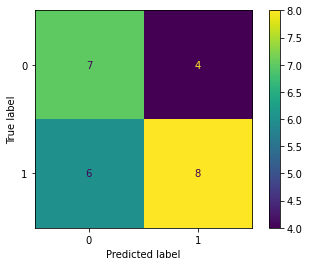

In [395]:
plot_confusion_matrix(clf_svm, #train vector machine
                      scaled_X_test, #passing our test
                      y_test, #passing our y test
                     )

In [396]:
#best for f1 
apr(y_test, clf_svm.predict(scaled_X_test))

Accuracy:0.6
Precision:0.6666666666666666
Recall:0.5714285714285714
F1:0.6153846153846153


(0.6, 0.6666666666666666, 0.5714285714285714, 0.6153846153846153)

In [137]:
#etiv not diff etiv
apr(y_test, clf_svm.predict(scaled_X_test))

Accuracy:0.6
Precision:0.6666666666666666
Recall:0.5714285714285714
F1:0.6153846153846153


(0.6, 0.6666666666666666, 0.5714285714285714, 0.6153846153846153)

In [ ]:
(0.88, 0.9444444444444444, 0.8292682926829268, 0.883116883116883)

In [57]:
#best for recall
# obviously this is not the best
apr(y_test, clf_svm.predict(scaled_X_test))

Accuracy:0.56
Precision:0.56
Recall:1.0
F1:0.717948717948718


(0.56, 0.56, 1.0, 0.717948717948718)

In [ ]:
#best for accuracy
apr(y_test, clf_svm.predict(scaled_X_test))

In [277]:
svm_acc_test = metrics.accuracy_score(y_test, clf_svm.predict(scaled_X_test))
svm_prec_test = metrics.precision_score(y_test, clf_svm.predict(scaled_X_test))
svm_rec_test = metrics.recall_score(y_test, clf_svm.predict(scaled_X_test))
svm_f1_test = metrics.f1_score(y_test, clf_svm.predict(scaled_X_test))

Support Vector Machine with SES

In [495]:
SES = data1.copy()
SES = SES.drop_duplicates(subset = "Subject ID",
                     keep = 'first')

In [ ]:
data.to_csv(r'SES.csv')

In [496]:
SES = feature_eng(SES)

In [497]:
#drop na

SES = SES.dropna()
SES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1 to 366
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Subject ID     95 non-null     object 
 1   Group          95 non-null     int64  
 2   Visit          95 non-null     int64  
 3   MR Delay       95 non-null     int64  
 4   Age            95 non-null     int64  
 5   EDUC           95 non-null     int64  
 6   SES            95 non-null     float64
 7   MMSE           95 non-null     float64
 8   CDR            95 non-null     float64
 9   eTIV           95 non-null     int64  
 10  nWBV           95 non-null     float64
 11  ASF            95 non-null     float64
 12  diff MR Delay  95 non-null     float64
 13  diff nWBV      95 non-null     float64
 14  diff ASF       95 non-null     float64
 15  diff etiv      95 non-null     float64
 16  % nWBV         95 non-null     float64
 17  Gender_M       95 non-null     uint8  
dtypes: float64(

In [498]:
SES.columns

Index(['Subject ID', 'Group', 'Visit', 'MR Delay', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'diff MR Delay', 'diff nWBV',
       'diff ASF', 'diff etiv', '% nWBV', 'Gender_M'],
      dtype='object')

In [499]:
feature_cols = [#'Subject ID', 
                #'Group', 
                #'Visit', 
                #'MR Delay'
                #'M/F',
                'Age', 
                'EDUC',
                'SES',
                'MMSE', 
                #'CDR', Improves by a mile off! Maybe we could predict CDR instead of dementia vs non dementia?
                #'eTIV', 
                #'nWBV', 
                #'ASF', 
                'diff MR Delay', 
                'diff nWBV',
                'diff ASF', 
                #'diff etiv', 
                #'% nWBV',
                'Gender_M'
]

In [500]:
#SES used!
#Demented = 1
X = SES[feature_cols]
X = sm.add_constant(X)
y = SES['Group']

C:\Users\Lauren Dunn\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [501]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=56, stratify=y)

In [502]:
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()

In [469]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [458]:
len(X_test)

24

In [459]:
len(y_test)

24

In [470]:
# this code serves to separate the constant from the dataframe
# if the consant is scaled it is reduced to 0 and becomes useless
# here we also re-index the scaled dataframe since it loses the index when scaled
if 'const' in list(X_train_eng.columns) and 'const' in list(X_test_eng.columns):

    # Fit and scale the training data
    c = pd.DataFrame(X_train_eng['const'])
    c.reset_index(drop = True, inplace = True)

    X_train_eng.drop(columns = 'const', inplace = True)

    scaled_X_train = scaler.fit_transform(X_train_eng)

    precols = list(X_train_eng.columns)
    scaled_X_train = pd.DataFrame(scaled_X_train, columns= precols)

    scaled_X_train = pd.concat([c,scaled_X_train], axis = 1)

    scaled_X_train.set_index(X_train_eng.reset_index()['index'], inplace = True)

    # Scale the test data 

    k = pd.DataFrame(X_test_eng['const'])
    k.reset_index(drop = True, inplace = True)

    X_test_eng.drop(columns = 'const', inplace = True)

    scaled_X_test = scaler.transform(X_test_eng)
    #print(len(scaled_X_test))

    scaled_X_test = pd.DataFrame(scaled_X_test, columns= precols)
    #print(len(scaled_X_test))

    scaled_X_test = pd.concat([k,scaled_X_test], axis = 1)
    #print(len(scaled_X_test))

    scaled_X_test.set_index(X_test_eng.reset_index()['index'], inplace = True)
    #print(len(scaled_X_test))

else:
    precols = list(X_train_eng.columns)
    
    scaled_X_train = scaler.fit_transform(X_train_eng)
    scaled_X_train = pd.DataFrame(scaled_X_train, columns= precols)
    
    scaled_X_train.set_index(X_train_eng.reset_index()['index'], inplace = True)

    scaled_X_test = scaler.transform(X_test_eng)
    print(len(scaled_X_test))
    scaled_X_test = pd.DataFrame(scaled_X_test, columns= precols)
    print(len(scaled_X_test))
    
    scaled_X_test.set_index(X_test_eng.reset_index()['index'], inplace = True)
    print(len(scaled_X_test))

In [471]:
clf_svm = SVC(random_state = 42) #randomstate = 42
clf_svm.fit(scaled_X_train, y_train) #training it on the training data

SVC(random_state=42)

Accuracy:0.8309859154929577
Precision:0.8048780487804879
Recall:0.8918918918918919
F1:0.8461538461538461


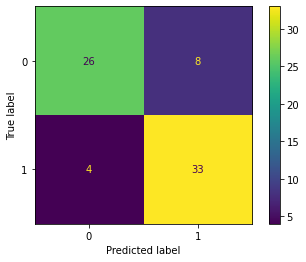

In [472]:
plot_confusion_matrix(clf_svm, #train vector machine
                      scaled_X_train, #passing our test
                      y_train, #passing our y test
                     )

#default scores
apr(y_train, clf_svm.predict(scaled_X_train))


svm_acc_train = metrics.accuracy_score(y_train, clf_svm.predict(scaled_X_train))
svm_prec_train = metrics.precision_score(y_train, clf_svm.predict(scaled_X_train))
svm_rec_train = metrics.recall_score(y_train, clf_svm.predict(scaled_X_train))
svm_f1_train = metrics.f1_score(y_train, clf_svm.predict(scaled_X_train))

Accuracy:0.8309859154929577
Precision:0.8048780487804879
Recall:0.8918918918918919
F1:0.8461538461538461


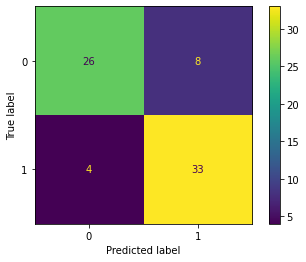

In [473]:
plot_confusion_matrix(clf_svm, #train vector machine
                      scaled_X_train, #passing our test
                      y_train, #passing our y test
                     )

#default scores
apr(y_train, clf_svm.predict(scaled_X_train))


svm_acc_train = metrics.accuracy_score(y_train, clf_svm.predict(scaled_X_train))
svm_prec_train = metrics.precision_score(y_train, clf_svm.predict(scaled_X_train))
svm_rec_train = metrics.recall_score(y_train, clf_svm.predict(scaled_X_train))
svm_f1_train = metrics.f1_score(y_train, clf_svm.predict(scaled_X_train))

Accuracy:0.625
Precision:0.6666666666666666
Recall:0.6153846153846154
F1:0.64


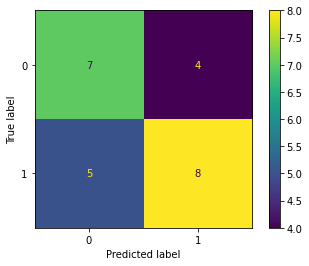

In [474]:
plot_confusion_matrix(clf_svm, #train vector machine
                      scaled_X_test, #passing our test
                      y_test, #passing our y test
                     )

#default scores
apr(y_test, clf_svm.predict(scaled_X_test))


svm_acc_train = metrics.accuracy_score(y_test, clf_svm.predict(scaled_X_test))
svm_prec_train = metrics.precision_score(y_test, clf_svm.predict(scaled_X_test))
svm_rec_train = metrics.recall_score(y_test, clf_svm.predict(scaled_X_test))
svm_f1_train = metrics.f1_score(y_test, clf_svm.predict(scaled_X_test))

Finding Best Grid Parameters

In [475]:
# creating list of parameter values
#is this a corase grid search? then we need to do a more finer grid search once we've chosen ?




param_grid = [
    {'kernel': ['linear', 'poly',  'rbf', 'sigmoid'], 
     'C': [0.001, 0.01, 0.1, 1.0, 10, 20, 30, 40, 50, 100, 1000], 
     'gamma': ['scale', 'auto', 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'random_state' : [42]}
]


optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=10, #cross validation #default is 5
    scoring='f1',
)

optimal_params.fit(scaled_X_train,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 42}


In [476]:
# 
clf_svm = SVC(random_state=42, C=100, gamma = 'auto', kernel = 'sigmoid')
clf_svm.fit(scaled_X_train, y_train) 

#(0.88, 0.9444444444444444, 0.8292682926829268, 0.883116883116883)

SVC(C=100, gamma='auto', kernel='sigmoid', random_state=42)

Accuracy:0.8169014084507042
Precision:0.8333333333333334
Recall:0.8108108108108109
F1:0.8219178082191781


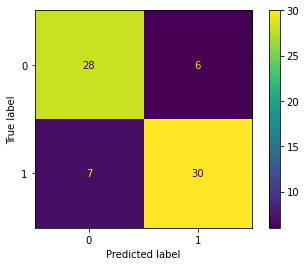

In [477]:
plot_confusion_matrix(clf_svm, #train vector machine
                      scaled_X_train, #passing our test
                      y_train, #passing our y test
                     )

#Best scores for f1
apr(y_train, clf_svm.predict(scaled_X_train))

svm_acc_train = metrics.accuracy_score(y_train, clf_svm.predict(scaled_X_train))
svm_prec_train = metrics.precision_score(y_train, clf_svm.predict(scaled_X_train))
svm_rec_train = metrics.recall_score(y_train, clf_svm.predict(scaled_X_train))
svm_f1_train = metrics.f1_score(y_train, clf_svm.predict(scaled_X_train))

Grdi search didnt beat default as we saw previosly

Accuracy:0.6666666666666666
Precision:0.6923076923076923
Recall:0.6923076923076923
F1:0.6923076923076923


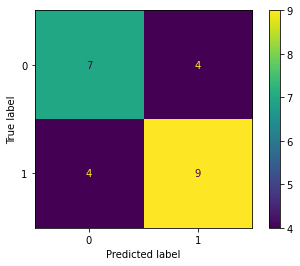

In [478]:
plot_confusion_matrix(clf_svm, #train vector machine
                      scaled_X_test, #passing our test
                      y_test, #passing our y test
                     )


#default scores
#apr(y_test, clf_svm.predict(scaled_X_test))


svm_acc_test = metrics.accuracy_score(y_test, clf_svm.predict(scaled_X_test))
svm_prec_test = metrics.precision_score(y_test, clf_svm.predict(scaled_X_test))
svm_rec_test = metrics.recall_score(y_test, clf_svm.predict(scaled_X_test))
svm_f1_test = metrics.f1_score(y_test, clf_svm.predict(scaled_X_test))

DecisionTreeClassifier

In [544]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_eng,y_train)

DecisionTreeClassifier()

Train

In [571]:
y_pred_train = tree_clf.predict(X_train_eng)


In [572]:
tree_mse = mean_squared_error(y_train, y_pred_train)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.4893226131278932

[[34  0]
 [17 20]]


Text(0.5, 257.44, 'Predicted label')

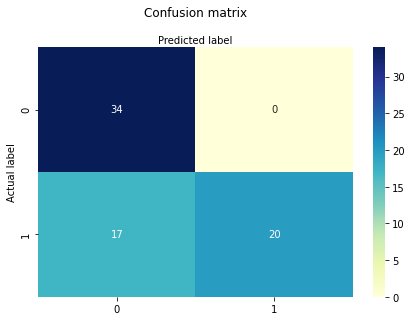

In [573]:
cm = confusion_matrix(y_train, y_pred_train) #, labels=[1,0]
print(cm)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [574]:
apr(y_train, y_pred_train)


dt_acc_train = metrics.accuracy_score(y_train, clf_svm.predict(X_train_eng))
dt_prec_train = metrics.precision_score(y_train, clf_svm.predict(X_train_eng))
dt_rec_train = metrics.recall_score(y_train, clf_svm.predict(X_train_eng))
dt_f1_train = metrics.f1_score(y_train, clf_svm.predict(X_train_eng))

Accuracy:0.7605633802816901
Precision:1.0
Recall:0.5405405405405406
F1:0.7017543859649124


Test

In [575]:
y_pred_test = tree_clf.predict(X_test_eng)


In [576]:
tree_mse = mean_squared_error(y_test, y_pred_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.5

[[11  0]
 [ 6  7]]


Text(0.5, 257.44, 'Predicted label')

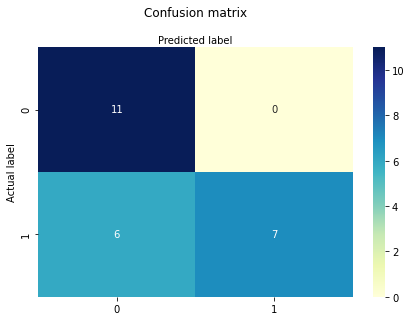

In [577]:
cm = confusion_matrix(y_test, y_pred_test) #, labels=[1,0]
print(cm)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [578]:
apr(y_test, y_pred_test)


dt_acc_test = metrics.accuracy_score(y_test, clf_svm.predict(X_test_eng))
dt_prec_test = metrics.precision_score(y_test, clf_svm.predict(X_test_eng))
dt_rec_test = metrics.recall_score(y_test, clf_svm.predict(X_test_eng))
dt_f1_test = metrics.f1_score(y_test, clf_svm.predict(X_test_eng))

Accuracy:0.75
Precision:1.0
Recall:0.5384615384615384
F1:0.7000000000000001


In [ ]:
GridSearch

In [718]:
# tree_para = {'criterion':['gini','entropy'],
#              'max_depth':[None, 4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
#             }


tree_para = {"max_depth": [1,2,3,4,5,6,7], 
             "min_samples_split": [2,3,4,5,6,7], 
             "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7]
 }


clf = GridSearchCV(DecisionTreeClassifier(), 
                   tree_para, 
                   cv=3,
                  scoring='f1')

# # print(clf)


clf.fit(X_train_eng,y_train)
print(clf.best_params_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [719]:
tree_clf = DecisionTreeClassifier(max_depth=2,
                                 min_samples_leaf=1,
                                 min_samples_split=3)
tree_clf.fit(X_train_eng,y_train)


DecisionTreeClassifier(max_depth=2, min_samples_split=3)

In [731]:
y_pred_train = tree_clf.predict(X_train_eng)

[[32  2]
 [11 26]]
Accuracy:0.8169014084507042
Precision:0.9285714285714286
Recall:0.7027027027027027
F1:0.7999999999999999


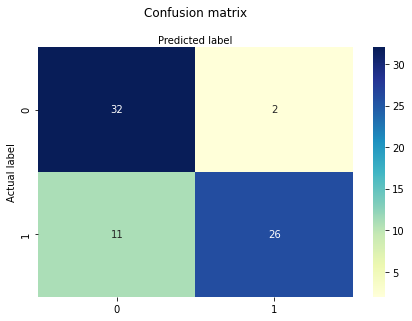

In [732]:
cm = confusion_matrix(y_train, y_pred_train) #, labels=[1,0]
print(cm)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

apr(y_train, y_pred_train)



dt_acc_train = metrics.accuracy_score(y_train, clf_svm.predict(X_train_eng))
dt_prec_train = metrics.precision_score(y_train, clf_svm.predict(X_train_eng))
dt_rec_train = metrics.recall_score(y_train, clf_svm.predict(X_train_eng))
dt_f1_train = metrics.f1_score(y_train, clf_svm.predict(X_train_eng))

In [733]:
y_pred_train = tree_clf.predict(X_test_eng)

[[ 8  3]
 [ 3 10]]
Accuracy:0.75
Precision:0.7692307692307693
Recall:0.7692307692307693
F1:0.7692307692307693


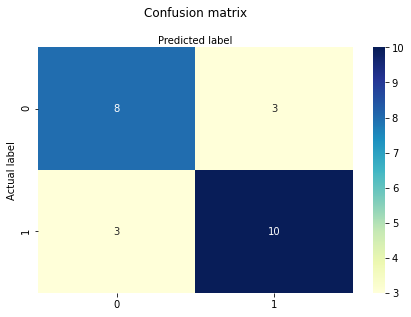

In [734]:
cm = confusion_matrix(y_test, y_pred_test) #, labels=[1,0]
print(cm)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


apr(y_test, y_pred_test)


dt_acc_test = metrics.accuracy_score(y_test, clf_svm.predict(X_test_eng))
dt_prec_test = metrics.precision_score(y_test, clf_svm.predict(X_test_eng))
dt_rec_test = metrics.recall_score(y_test, clf_svm.predict(X_test_eng))
dt_f1_test = metrics.f1_score(y_test, clf_svm.predict(X_test_eng))

m = 'Decision Tree'

In [ ]:
performance_metrics.append([m, dt_acc_test, dt_prec_test, dt_rec_test, dt_f1_test ],
                          [dt_acc_train, dt_prec_train, dt_rec_train, dt_f1_train])

RandomForest

1) Do not need to be scaled
2) No multicolinearity
3) 

In [287]:
X_train_eng.head(50)

,Age,EDUC,MMSE,diff MR Delay,diff nWBV,diff etiv,Gender_M
182,65,15,28.0,802.0,-0.013,-2.0,0
77,83,18,25.0,486.0,-0.009,5.0,0
89,69,14,15.0,352.0,-0.007,-2.0,1
341,62,12,30.0,695.0,-0.011,-1.0,1
210,80,11,30.0,1218.0,-0.020,3.0,0
34,88,14,29.0,489.0,-0.002,-8.0,0
164,69,18,29.0,956.0,-0.006,32.0,0
26,77,16,16.0,504.0,-0.001,-12.0,1
224,87,12,30.0,675.0,0.015,-21.0,1
339,79,16,29.0,1212.0,-0.009,8.0,1


Kaggle MRI

In [327]:
kfolds = 5
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_train_eng, y_train, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_train_eng, y_train )

PredictedOutput = SelectedRFModel.predict(X_test_eng)
test_score = SelectedRFModel.score(X_test_eng, y_test)
test_recall = recall_score(y_test, PredictedOutput, pos_label=1)
#fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput, pos_label=1)
#test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
#print("Test AUC with the best parameters is:", test_auc)

#m = 'Random Forest'
#acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 1.0
Best parameters of M, d, m are:  2 8 1
Test accuracy with the best parameters is 0.7083333333333334
Test recall with the best parameters is: 0.6923076923076923


In [661]:
#creating empty classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

In [662]:
#Cross validation?
#classfication scores
rf_score = cross_val_score(rf, X_train_eng, y_train, cv=5).mean()
et_score = cross_val_score(et, X_train_eng, y_train, cv=5).mean()

In [663]:
print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored 0.6742857142857144
Extra Random scored 0.6304761904761904


In [597]:
# #creating empty GridSearch 
# rf_params = {
#     'n_estimators': [50, 100, 150, 200, 250, 300],
#     'max_depth': [5, 6, 7, 8, 9, 10],
# }
# if rf_score > et_score:
#     gs = GridSearchCV(rf, param_grid=rf_params, cv=5)  
# else:
#     gs = GridSearchCV(et, param_grid=rf_params, cv=5)

In [643]:
print([x for x in range(2,15,2)] )

[2, 4, 6, 8, 10, 12, 14]


In [664]:
# creating list of parameter values
#is this a corase grid search? then we need to do a more finer grid search once we've chosen ?

rf_params = {
    'n_estimators': [2,4,6,8,10,12],
    'max_features':[1,2,3,4,5,6,7,8], #range(1,9)
    'max_depth': [1,2,3,4,5,6,7,8]
     #'random_state': [0] #range(1,9)
}


optimal_params = GridSearchCV(
    rf,
    rf_params,
    cv=5, #cross validation #default is 5
    scoring='f1',
)

optimal_params.fit(X_train_eng,y_train)
print(optimal_params.best_params_)

{'max_depth': 3, 'max_features': 7, 'n_estimators': 2}


In [ ]:
# # creating list of parameter values
# #is this a corase grid search? then we need to do a more finer grid search once we've chosen ?

# rf_params = {
#     'n_estimators': [2,4,6,8,10,12],
#     'max_features':[1,2,3,4,5,6,7,8], #range(1,9)
#     'max_depth': [1,2,3,4,5,6,7,8] #range(1,9)
# }


# optimal_params = GridSearchCV(
#     rf,
#     rf_params,
#     cv=5, #cross validation #default is 5
#     scoring='f1',
# )

# optimal_params.fit(X_train_eng,y_train)
# print(optimal_params.best_params_)

In [617]:
#classfier score
optimal_params.score(X_train_eng, y_train)

0.7837837837837838

In [ ]:
forestModel = RandomForestClassifier()
gs = forestModel.fit(X_train_eng, y_train )


In [995]:
X_train_eng.head()

,const,Age,EDUC,SES,MMSE,diff MR Delay,diff nWBV,diff ASF,Gender_M
214,1.0,76,18,2.0,30.0,679.0,0.005,0.019,0
103,1.0,70,16,3.0,30.0,395.0,-0.003,-0.011,0
30,1.0,81,12,3.0,27.0,617.0,0.007,-0.017,1
142,1.0,68,12,4.0,29.0,451.0,0.011,0.001,1
311,1.0,69,18,2.0,29.0,539.0,-0.002,-0.008,0


In [692]:
forestModel = RandomForestClassifier(n_estimators=2, max_features=7, 
                                          max_depth=3, random_state=0)

In [700]:
forestModel = RandomForestClassifier(n_estimators=4, max_features=4, 
                                          max_depth=1, random_state=0)

In [638]:
#Didnt generalise well

forestModel = RandomForestClassifier(n_estimators=6, max_features=5,
                                          max_depth=3, random_state=0)

In [649]:
#overfit

forestModel = RandomForestClassifier(n_estimators=14, max_features=2,
                                          max_depth=7, random_state=0)

In [701]:
gs = forestModel.fit(X_train_eng, y_train)

In [702]:
## Predict on Train
y_pred = gs.predict(X_train_eng)

## Check Accuracy, Precision, Recall & F1
apr(y_pred, y_train)

Accuracy:0.7746478873239436
Precision:0.7837837837837838
Recall:0.7837837837837838
F1:0.7837837837837838


(0.7746478873239436,
 0.7837837837837838,
 0.7837837837837838,
 0.7837837837837838)

[[26  8]
 [ 8 29]]


Text(0.5, 257.44, 'Predicted label')

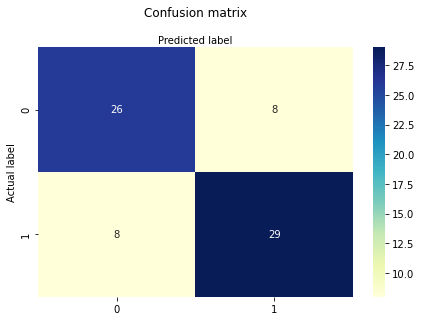

In [703]:
cm = confusion_matrix(y_train, y_pred) #, labels=[1,0]
print(cm)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [704]:
## Predict on Test
y_pred_test = gs.predict(X_test_eng)


# ## Check Accuracy, Precision, Recall & F1
# apr(y_pred_test, y_test)

[[ 8  3]
 [ 3 10]]


Text(0.5, 257.44, 'Predicted label')

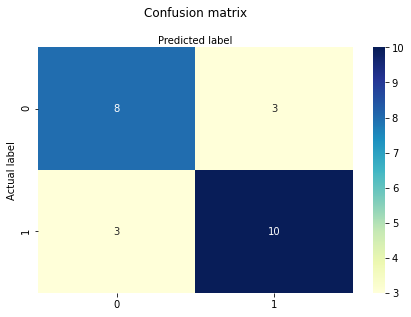

In [705]:
cm = confusion_matrix(y_test, y_pred_test) #, labels=[1,0]
print(cm)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [706]:
# #running the beautiful metrics function
# # produce_confusion('Stayed','Churned','binary',metric,'pred','Churn Value')

# from sklearn.metrics import confusion_matrix

# conf_mat = confusion_matrix(y_test, y_pred_test)
# print(conf_mat)

In [707]:
## Predict on Train
y_pred_test = gs.predict(X_test_eng)

## Check Accuracy, Precision, Recall & F1
apr(y_pred_test, y_test)

Accuracy:0.75
Precision:0.7692307692307693
Recall:0.7692307692307693
F1:0.7692307692307693


(0.75, 0.7692307692307693, 0.7692307692307693, 0.7692307692307693)

In [708]:
y_pred_train = gs.predict(X_train_eng)

rf_acc_train = metrics.accuracy_score(y_train, y_pred_train)
rf_prec_train = metrics.precision_score(y_train, y_pred_train)
rf_rec_train = metrics.recall_score(y_train, y_pred_train)
rf_f1_train = metrics.f1_score(y_train, y_pred_train)

In [709]:
y_pred_test = gs.predict(X_test_eng)

rf_acc_test = metrics.accuracy_score(y_test, y_pred_test)
rf_prec_test = metrics.precision_score(y_test, y_pred_test)
rf_rec_test = metrics.recall_score(y_test, y_pred_test)
rf_f1_test = metrics.f1_score(y_test, y_pred_test)

In [ ]:
dt_acc_train, dt_prec_train, dt_rec_train, dt_f1_train
dt_acc_test, dt_prec_test, dt_rec_test, dt_f1_test

Creating Final Table

In [735]:
data_for_df = {'Model_Name':['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'RandomForest'],
              'Training Recall' : [lg_rec_train, svm_rec_train, dt_rec_train, rf_rec_train],
              'Test Recall' :[lg_rec_test, svm_rec_test, dt_rec_test, rf_rec_test],
              'Training Accuracy': [lg_acc_train, svm_acc_train, dt_acc_train, rf_acc_train ],
              'Test Accuracy': [lg_acc_test,svm_acc_test, dt_acc_test , rf_acc_test],
              'Training Precision': [lg_prec_train,svm_prec_train, dt_prec_train, rf_prec_train],
               'Test Precision': [lg_prec_test,svm_prec_test, dt_prec_test, rf_prec_test ],
               'Training F1':[lg_f1_train,svm_f1_train, dt_f1_train, rf_f1_train ],
               'Test F1': [lg_f1_test,svm_f1_test, dt_f1_test, rf_f1_test]
              }

df = pd.DataFrame(data_for_df)
df

,Model_Name,Training Recall,Test Recall,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training F1,Test F1
0,Logistic Regression,0.804878,0.714286,0.853333,0.720000,0.916667,0.769231,0.857143,0.740741
1,Support Vector Machine,0.810811,0.692308,0.816901,0.666667,0.833333,0.692308,0.821918,0.692308
2,Decision Tree,1.000000,1.000000,0.521127,0.541667,0.521127,0.541667,0.685185,0.702703
3,RandomForest,0.783784,0.769231,0.774648,0.750000,0.783784,0.769231,0.783784,0.769231


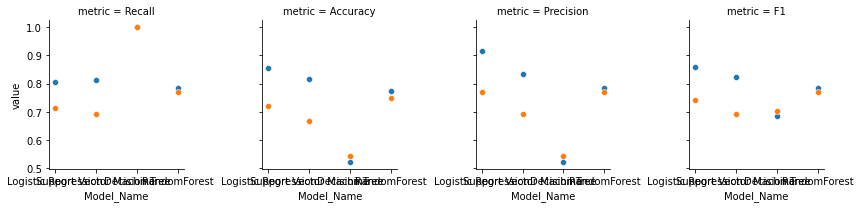

In [839]:
g = sns.FacetGrid(df2, col="metric",hue='training_test' , margin_titles=True
                 ) #margin_titles=True
g.map(sns.scatterplot, 
      "Model_Name", 
      "value")

#plt.ylim(0.1, 1.0)
# plt.xticks(rotation=45)
# plt.xlabel("Model Name")
# plt.ylabel("Recall Score")
# plt.title("Recall scores of Classification Models")


TypeError: 'AxesSubplot' object is not subscriptable

In [810]:
df2.head()

,Model_Name,variable,value,training/test,metric
0,Logistic Regression,Training Recall,0.804878,Training,Recall
1,Support Vector Machine,Training Recall,0.810811,Training,Recall
2,Decision Tree,Training Recall,1.000000,Training,Recall
3,RandomForest,Training Recall,0.783784,Training,Recall
4,Logistic Regression,Test Recall,0.714286,Test,Recall


In [736]:
#plotting these scores on a graph so its easily comparable!
df2 = pd.melt(df, id_vars ='Model_Name', value_vars=['Training Recall', 'Test Recall', 'Training Accuracy',
       'Test Accuracy', 'Training Precision', 'Test Precision', 'Training F1',
       'Test F1'])


df2

,Model_Name,variable,value
0,Logistic Regression,Training Recall,0.804878
1,Support Vector Machine,Training Recall,0.810811
2,Decision Tree,Training Recall,1.000000
3,RandomForest,Training Recall,0.783784
4,Logistic Regression,Test Recall,0.714286
5,Support Vector Machine,Test Recall,0.692308
6,Decision Tree,Test Recall,1.000000
7,RandomForest,Test Recall,0.769231
8,Logistic Regression,Training Accuracy,0.853333
9,Support Vector Machine,Training Accuracy,0.816901


In [814]:
df2[['training_test','metric']]= df2['variable'].str.split(' ', expand=True)

In [815]:
df2.head()

,Model_Name,variable,value,training/test,metric,training_test
0,Logistic Regression,Training Recall,0.804878,Training,Recall,Training
1,Support Vector Machine,Training Recall,0.810811,Training,Recall,Training
2,Decision Tree,Training Recall,1.000000,Training,Recall,Training
3,RandomForest,Training Recall,0.783784,Training,Recall,Training
4,Logistic Regression,Test Recall,0.714286,Test,Recall,Test


               Model_Name   variable     value
0     Logistic Regression  Training   0.804878
1  Support Vector Machine  Training   0.810811
2           Decision Tree  Training   1.000000
3            RandomForest  Training   0.783784
4     Logistic Regression      Test   0.714286
5  Support Vector Machine      Test   0.692308
6           Decision Tree      Test   1.000000
7            RandomForest      Test   0.769231


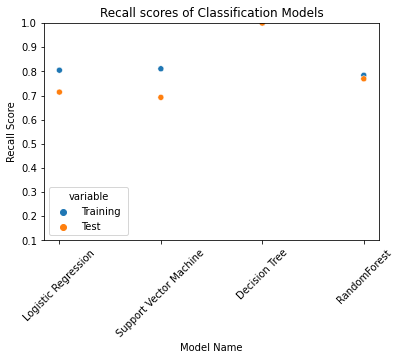

In [787]:
recall_Df = df2.copy()
recall_Df = df2[(df2['variable'] == 'Test Recall') | (df2['variable'] == 'Training Recall')]

recall_Df = recall_Df.replace('Recall', '', regex=True)
print(recall_Df)

import matplotlib.pyplot as plt
plt.ylim(0.1, 1.0)
plt.xticks(rotation=45)
plt.xlabel("Model Name")
plt.ylabel("Recall Score")
plt.title("Recall scores of Classification Models")


sns.scatterplot(data=recall_Df, 
                x="Model_Name", 
                y="value", 
                hue='variable'
               )
plt.savefig("Recall Scores Classification Models", bbox_inches = 'tight')

                Model_Name   variable     value training/test metric  \
24     Logistic Regression  Training   0.857143      Training          
25  Support Vector Machine  Training   0.821918      Training          
26           Decision Tree  Training   0.685185      Training          
27            RandomForest  Training   0.783784      Training          
28     Logistic Regression      Test   0.740741          Test          
29  Support Vector Machine      Test   0.692308          Test          
30           Decision Tree      Test   0.702703          Test          
31            RandomForest      Test   0.769231          Test          

   training_test  
24      Training  
25      Training  
26      Training  
27      Training  
28          Test  
29          Test  
30          Test  
31          Test  


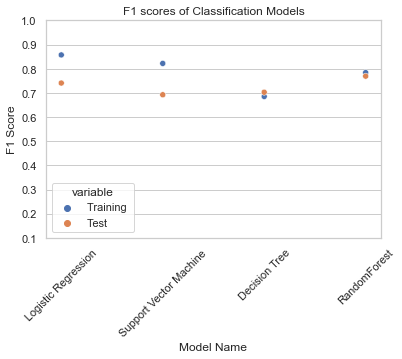

In [968]:
f1_Df = df2.copy()
f1_Df = df2[(df2['variable'] == 'Test F1') | (df2['variable'] == 'Training F1')]

f1_Df = f1_Df.replace('F1', '', regex=True)
print(f1_Df)

import matplotlib.pyplot as plt
plt.ylim(0.1, 1.0)
plt.xticks(rotation=45)
plt.xlabel("Model Name")
plt.ylabel("F1 Score")
plt.title("F1 scores of Classification Models")


sns.scatterplot(data=f1_Df, 
                x="Model_Name", 
                y="value", 
                hue='variable'
               ).grid(axis='x')
plt.savefig("F1 Scores Classification Models", bbox_inches = 'tight')

In [979]:
f1_Df = df2.copy()

f1_Df = df2[(df2['variable'] == 'Test F1') | (df2['variable'] == 'Training F1')]
f1_Df

,Model_Name,variable,value,training/test,metric,training_test
24,Logistic Regression,Training F1,0.857143,Training,F1,Training
25,Support Vector Machine,Training F1,0.821918,Training,F1,Training
26,Decision Tree,Training F1,0.685185,Training,F1,Training
27,RandomForest,Training F1,0.783784,Training,F1,Training
28,Logistic Regression,Test F1,0.740741,Test,F1,Test
29,Support Vector Machine,Test F1,0.692308,Test,F1,Test
30,Decision Tree,Test F1,0.702703,Test,F1,Test
31,RandomForest,Test F1,0.769231,Test,F1,Test


In [980]:
f1_Df = f1_Df.drop(f1_Df.columns[[1,3]], axis=1) 

In [983]:
f1_Df

,Model_Name,value,metric,training_test
24,Logistic Regression,0.857143,F1,Training
25,Support Vector Machine,0.821918,F1,Training
26,Decision Tree,0.685185,F1,Training
27,RandomForest,0.783784,F1,Training
28,Logistic Regression,0.740741,F1,Test
29,Support Vector Machine,0.692308,F1,Test
30,Decision Tree,0.702703,F1,Test
31,RandomForest,0.769231,F1,Test


In [985]:
#f1_Df.columns = ['Model_Name', 'metric', 'training_test', 'value']
f1_Df = f1_Df[['Model_Name', 'metric', 'training_test', 'value']]
f1_Df



,Model_Name,metric,training_test,value
24,Logistic Regression,F1,Training,0.857143
25,Support Vector Machine,F1,Training,0.821918
26,Decision Tree,F1,Training,0.685185
27,RandomForest,F1,Training,0.783784
28,Logistic Regression,F1,Test,0.740741
29,Support Vector Machine,F1,Test,0.692308
30,Decision Tree,F1,Test,0.702703
31,RandomForest,F1,Test,0.769231


In [988]:
#Order = [1,2,4,3,2,4,3,1]

f1_Df['Order'] = [1,2,4,3,2,4,3,1]

In [994]:
#f1_Df.columns = ['Model Name', 'Performance Metric', 'Training / Test', 'Metric Value', 'Order']
f1_Df = f1_Df.drop(f1_Df.columns[[0]], axis=1) 
f1_Df.reset_index()
f1_Df


,Model Name,Performance Metric,Training / Test,Metric Value,Order
0,Logistic Regression,F1,Training,0.857143,1
1,Support Vector Machine,F1,Training,0.821918,2
2,Decision Tree,F1,Training,0.685185,4
3,RandomForest,F1,Training,0.783784,3
4,Logistic Regression,F1,Test,0.740741,2
5,Support Vector Machine,F1,Test,0.692308,4
6,Decision Tree,F1,Test,0.702703,3
7,RandomForest,F1,Test,0.769231,1


                Model_Name   variable     value
8      Logistic Regression  Training   0.853333
9   Support Vector Machine  Training   0.816901
10           Decision Tree  Training   0.521127
11            RandomForest  Training   0.774648
12     Logistic Regression      Test   0.720000
13  Support Vector Machine      Test   0.666667
14           Decision Tree      Test   0.541667
15            RandomForest      Test   0.750000


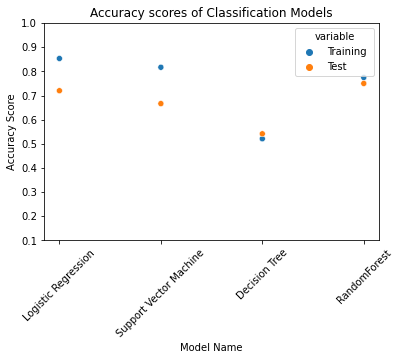

In [789]:
acc_df = df2.copy()
acc_df = acc_df[(acc_df['variable'] == 'Test Accuracy') | (acc_df['variable'] == 'Training Accuracy')]

acc_df = acc_df.replace('Accuracy', '', regex=True)
print(acc_df)

plt.ylim(0.1, 1.0)
plt.xticks(rotation=45)
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.title("Accuracy scores of Classification Models")


sns.scatterplot(data=acc_df, 
                x="Model_Name", 
                y="value", 
                hue='variable'
               )
plt.savefig("Accuracy Scores Classification Models", bbox_inches = 'tight')

                Model_Name   variable     value training/test metric  \
16     Logistic Regression  Training   0.916667      Training          
17  Support Vector Machine  Training   0.833333      Training          
18           Decision Tree  Training   0.521127      Training          
19            RandomForest  Training   0.783784      Training          
20     Logistic Regression      Test   0.769231          Test          
21  Support Vector Machine      Test   0.692308          Test          
22           Decision Tree      Test   0.541667          Test          
23            RandomForest      Test   0.769231          Test          

   training_test  
16      Training  
17      Training  
18      Training  
19      Training  
20          Test  
21          Test  
22          Test  
23          Test  


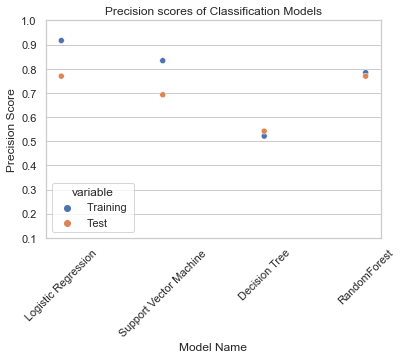

In [967]:
precision_Df = df2.copy()
precision_Df = precision_Df[(precision_Df['variable'] == 'Test Precision') | (precision_Df['variable'] == 'Training Precision')]

precision_Df = precision_Df.replace('Precision', '', regex=True)
print(precision_Df)

plt.ylim(0.1, 1.0)
plt.xticks(rotation=45)
plt.xlabel("Model Name")
plt.ylabel("Precision Score")
plt.title("Precision scores of Classification Models")


sns.scatterplot(data=precision_Df, 
                x="Model_Name", 
                y="value", 
                hue='variable'
               ).grid(axis='x')
plt.savefig("Precision Scores Classification Models", bbox_inches = 'tight')

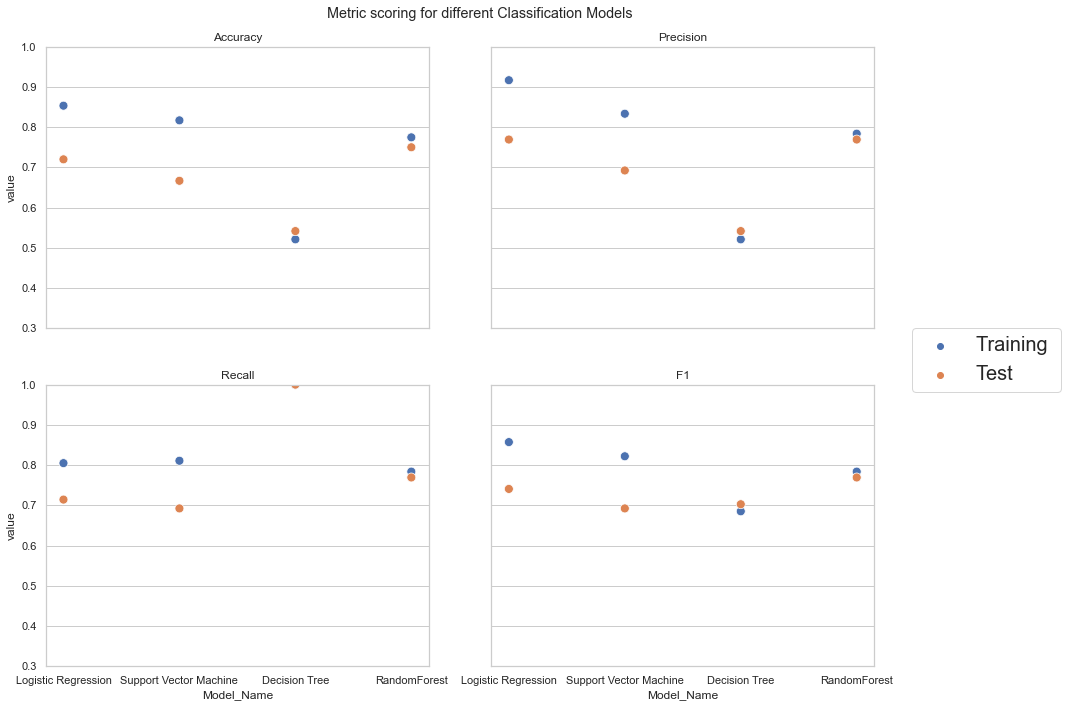

In [965]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10) ) # figsize=(18, 10)
fig.suptitle('Metric scoring for different Classification Models', x = 0.45)


sns.scatterplot(ax=axes[0, 1], 
                data=precision_Df, 
                x="Model_Name", 
                y="value", 
                hue='variable',
                s=80,
               legend = False).set_title("Precision")
axes[0,1].grid(axis = 'x')


sns.scatterplot(ax=axes[0, 0],
                data=acc_df, 
                x="Model_Name", 
                y="value", 
                hue='variable',
               legend = False,
                s=80
               )
axes[0,0].set_title("Accuracy")
axes[0,0].grid(axis = 'x')

sns.scatterplot(ax=axes[1, 1],
                data=f1_Df, 
                x="Model_Name", 
                y="value", 
                hue='variable',
                s=80
               #legend = False
               ).set_title("F1")
axes[1,1].grid(axis = 'x')
#axes[1.1].set_ylim(top = 1.0, bottom = 0.2)

x = sns.scatterplot(ax=axes[1, 0],
                data=recall_Df, 
                x="Model_Name", 
                y="value", 
                hue='variable',
               legend = False,
                s=80
               ).set_ylim(top=1.0, bottom =0.3 )
axes[1,0].set_title("Recall")
axes[1,0].grid(axis = 'x')

plt.legend(bbox_to_anchor=(1.1, 1.2), loc=2, borderaxespad=0.,  prop={'size': 20})

fig.tight_layout()
plt.subplots_adjust(hspace = 0.2)

plt.savefig("Metric scoring for different Classification Models", bbox_inches = 'tight')


    
#plt.subplots()


# fig, axs = plt.subplots(2, 2)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')


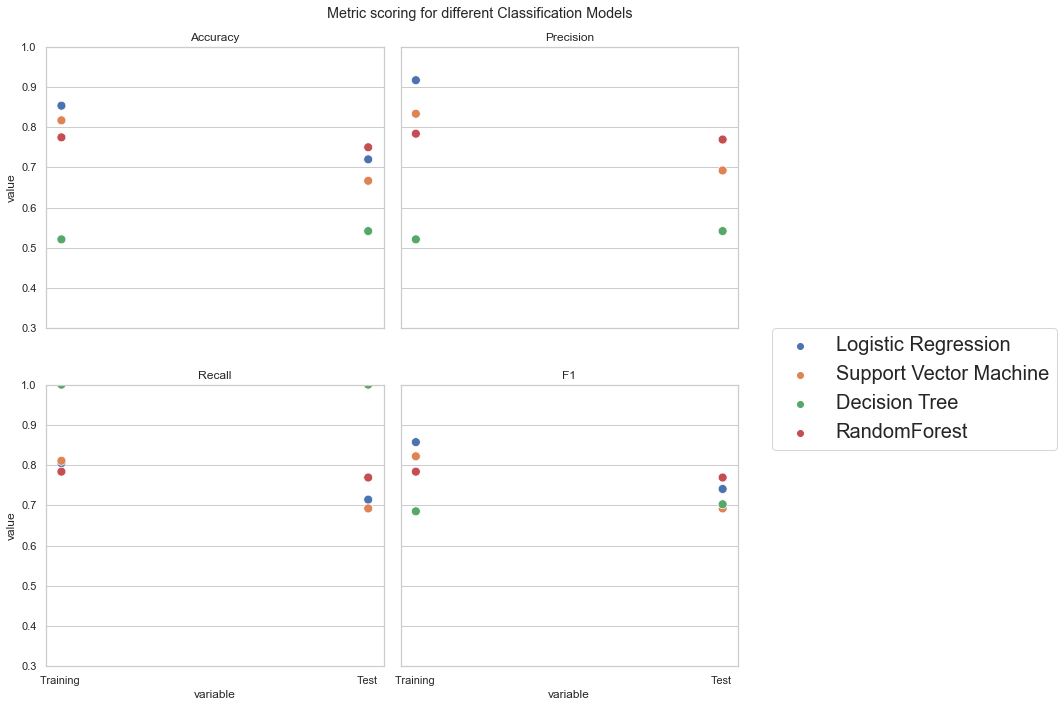

In [969]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10) ) # figsize=(18, 10)
fig.suptitle('Metric scoring for different Classification Models', x = 0.45)


sns.scatterplot(ax=axes[0, 1], 
                data=precision_Df, 
                x="variable", 
                y="value", 
                hue='variable',
                s=80,
               legend = False).set_title("Precision")
axes[0,1].grid(axis = 'x')


sns.scatterplot(ax=axes[0, 0],
                data=acc_df, 
                x="variable", 
                y="value", 
                hue='variable',
               legend = False,
                s=80
               )
axes[0,0].set_title("Accuracy")
axes[0,0].grid(axis = 'x')

sns.scatterplot(ax=axes[1, 1],
                data=f1_Df, 
                x="variable", 
                y="value", 
                hue='variable',
                s=80
               #legend = False
               ).set_title("F1")
axes[1,1].grid(axis = 'x')
#axes[1.1].set_ylim(top = 1.0, bottom = 0.2)

x = sns.scatterplot(ax=axes[1, 0],
                data=recall_Df, 
                x="variable", 
                y="value", 
                hue='variable',
               legend = False,
                s=80
               ).set_ylim(top=1.0, bottom =0.3 )
axes[1,0].set_title("Recall")
axes[1,0].grid(axis = 'x')

plt.legend(bbox_to_anchor=(1.1, 1.2), loc=2, borderaxespad=0.,  prop={'size': 20})

fig.tight_layout()
plt.subplots_adjust(hspace = 0.2)

plt.savefig("Metric scoring for different Classification Models", bbox_inches = 'tight')


    
#plt.subplots()


# fig, axs = plt.subplots(2, 2)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')


ValueError: num must be 1 <= num <= 2, not 3

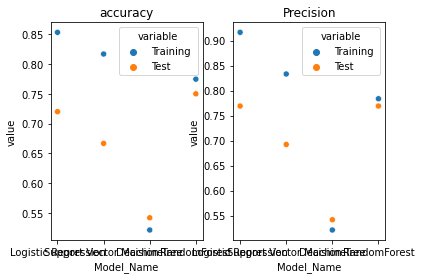

In [847]:
plt.subplot(1, 2, 1)
sns.scatterplot(#ax=axes[0, 1],
                data=acc_df, 
                x="Model_Name", 
                y="value", 
                hue='variable'
               ).set_title("accuracy")

plt.subplot(1,2,2)
sns.scatterplot(#ax=axes[0, 0], 
                data=precision_Df, x="Model_Name", y="value", hue='variable').set_title("Precision")



plt.subplot(1,2,3 )

sns.scatterplot(#ax=axes[1, 0],
                data=f1_Df, 
                x="Model_Name", 
                y="value", 
                hue='variable'
               ).set_title("F1")



plt.subplot(1,2,4)
sns.scatterplot(#ax=axes[1, 1],
                data=recall_Df, 
                x="Model_Name", 
                y="value", 
                hue='variable'
               ).set_title("recall")

In [ ]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)

In [ ]:
sns.scatterplot(#ax=axes[1, 1],
                data=recall_Df, 
                x="Model_Name", 
                y="value", 
                hue='variable'
               ).set_title("recall")

In [ ]:
#box = dict(facecolor='yellow', pad=5, alpha=0.2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.subplots_adjust(left=0.2, wspace=0.6)

# Fixing random state for reproducibility


ax1.recall_Df.plot.scatter(x="Model_Name", 
                y="value", 
                c='variable'
ax1.set_title('ylabels not aligned')
ax1.set_ylabel('misaligned 1', bbox=box)
ax1.set_ylim(0, 1)

ax3.set_ylabel('misaligned 2', bbox=box)
ax3.plot(np.random.rand(10))

xlabel = -0.3  # axes coords

ax2.set_title('ylabels aligned')
ax2.plot(2000 * np.random.rand(10))
ax2.set_ylabel('aligned 1', bbox=box)
ax2.yaxis.set_label_coords(xlabel, 0.5)
ax2.set_ylim(0, 2000)

ax4.plot(np.random.rand(10))
ax4.set_ylabel('aligned 2', bbox=box)
ax4.yaxis.set_label_coords(xlabel, 0.5)

plt.show()

AttributeError: 'PathCollection' object has no property 'hue'

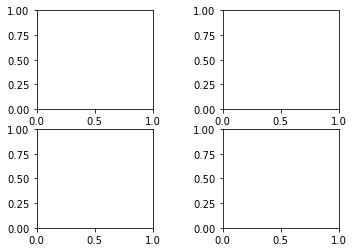

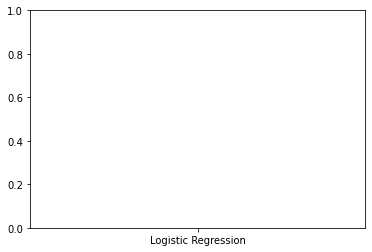

In [851]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.subplots_adjust(left=0.2, wspace=0.6)

# Fixing random state for reproducibility


ax1 = recall_Df.plot.scatter(x="Model_Name", 
                y="value", 
                hue='variable')
ax1.set_title('ylabels not aligned')
ax1.set_ylabel('misaligned 1', bbox=box)
ax1.set_ylim(0, 1)
